In [1]:
import pandas as pd

import seaborn as sns

import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
from pathlib import Path

# UMAP

In [2]:
# Function to bin event_id into 50 bins
def bin_metric(df, column, bins):

    # Get the name of the metric which is name of the column
    metric = column

    df[f"binned_{metric}"] = pd.cut(df[column], bins=bins, labels=False)
    return df

In [14]:
# Load test embedding

Umap = pd.read_feather(
    "/mnt/upramdya_data/MD/Ballpushing_Exploration/Datasets/250313_StdContacts_Ctrl_cutoff_300frames_Data/UMAP/250313_pooled_standardized_contacts_Allfeatures.feather"
)

In [4]:
Umap.head()

UMAP1     UMAP2  duration  \
0 -6.622726  0.956308       300   
1 -2.230606  5.496466       300   
2 -0.917639 -0.644856       300   
3 -4.492699  6.422276       300   
4 -0.245321 -0.421481       300   

                                                 fly   event_type  \
0  230705_FeedingState_2_AM_Videos_Tracked_arena5...  interaction   
1  230705_FeedingState_2_AM_Videos_Tracked_arena5...  interaction   
2  230705_FeedingState_2_AM_Videos_Tracked_arena5...       random   
3  230705_FeedingState_2_AM_Videos_Tracked_arena5...  interaction   
4  230705_FeedingState_2_AM_Videos_Tracked_arena5...       random   

         start          end  start_frame  end_frame  \
0   142.034483   152.344828         4119       4418   
1    24.000000    34.310345          696        995   
2   722.965517   733.275862        20966      21265   
3   314.758621   325.068966         9128       9427   
4  3747.000000  3757.310345       108663     108962   

   x_centre_preprocessed_fly_vel_mean  ...  Nickname  Brain region    Date  \
0                           -0.014037  ...        PR       Control  230705   
1                           -0.346741  ...        PR       Control  230705   
2                           -0.672787  ...        PR       Control  230705   
3                            0.001867  ...        PR       Control  230705   
4                            0.301309  ...        PR       Control  230705   

   Genotype  Period  FeedingState  Orientation  Light  Crossing  event_id  
0        PR      AM       starved          std     on      None         1  
1        PR      AM       starved          std     on      None         0  
2        PR      AM       starved          std     on      None         0  
3        PR      AM       starved          std     on      None         3  
4        PR      AM       starved          std     on      None         1  

[5 rows x 4554 columns]

In [15]:
# Define and create if not exist output directory

output_dir = Path("/mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250314_StdContacts_Ctrl_noOverlap_Data_cutoff_300Frames_multiclusters")

output_dir.mkdir(parents=True, exist_ok=True)

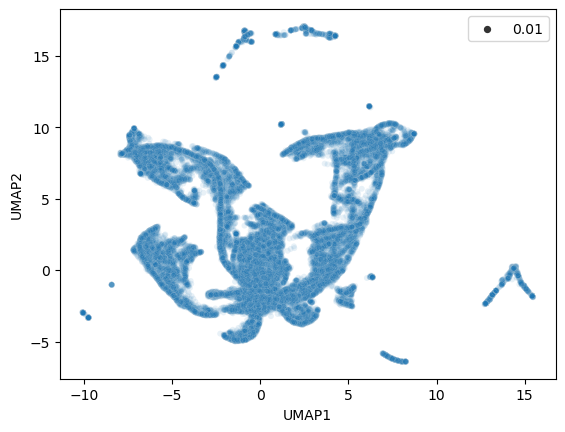

In [16]:
# Scatter plot of UMAP1 vs UMAP2

sns.scatterplot(data=Umap, x="UMAP1", y="UMAP2", size=0.01, alpha = 0.1)

# save the plot

plt.savefig(f"{output_dir}/UMAPTest.png")


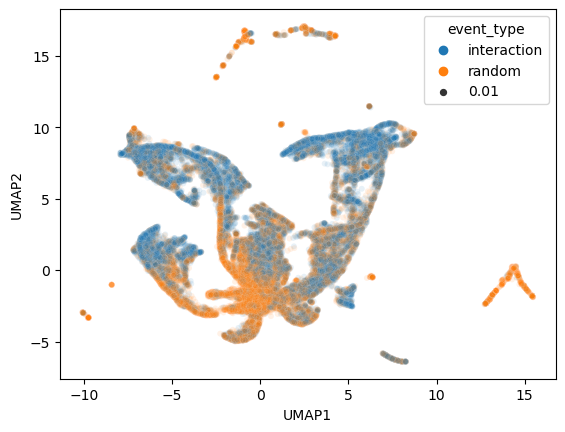

In [17]:
# Color code by event_type

sns.scatterplot(data=Umap, x="UMAP1", y="UMAP2", size=0.01, alpha = 0.1, hue="event_type")

# Save the plot

plt.savefig(f"{output_dir}/UMAP_event_types.png")

/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:111

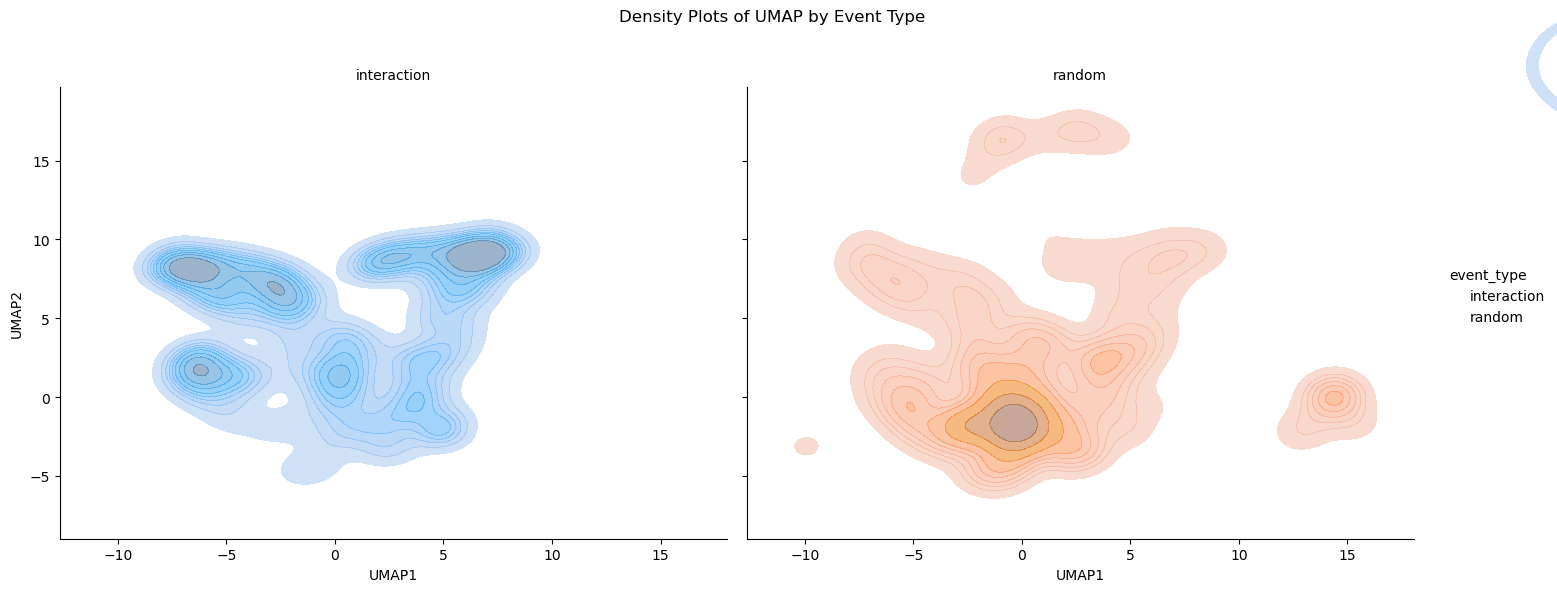

In [18]:
# Create a FacetGrid with two columns, one for each event_type
g = sns.FacetGrid(Umap, col="event_type", hue="event_type", sharex=True, sharey=True, height=6, aspect=1.2)

# Map the kdeplot to the FacetGrid
g.map(sns.kdeplot, "UMAP1", "UMAP2", fill=True, alpha=0.5)

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Density Plots of UMAP by Event Type")

# Save the plot
plt.savefig(f"{output_dir}/UMAP_event_types_density.png")
plt.show()
plt.close()

# Clustering

In [22]:
# Identify clusters based on KMeans

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20, random_state=0).fit(Umap[["UMAP1", "UMAP2"]])

Umap["cluster"] = kmeans.labels_


In [23]:
Umap["cluster"].unique()

array([17,  0, 18, 15,  6,  5, 10, 19, 11,  1, 13,  8, 14,  3, 12,  2,  9,
       16,  7,  4], dtype=int32)

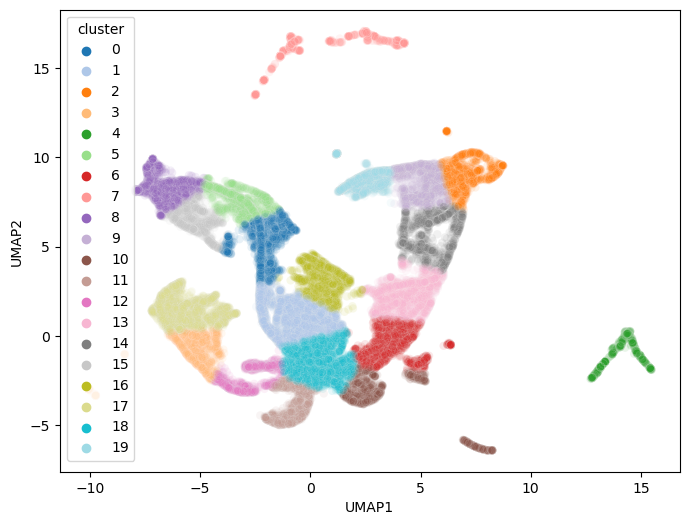

In [47]:

plt.figure(figsize=(8, 6))

sns.scatterplot(data=Umap, x="UMAP1", y="UMAP2", alpha = 0.1, hue="cluster", palette="tab20")

# Save the plot

plt.savefig(f"{output_dir}/UMAP_Clusters.png")

In [ ]:
# Same with density

plt.figure(figsize=(8, 6))

sns.kdeplot(data=Umap, x="UMAP1", y="UMAP2", fill=True, alpha=0.5, hue="cluster", palette="tab10")

plt.savefig(f"{output_dir}/UMAP_Clusters_density.png")

In [ ]:
# Get columns that do not have "centre" in their name

Umap.columns[~Umap.columns.str.contains("centre")]

# Looking into particular conditions

## Light

In [ ]:
# Check Light values: 

Umap["Light"].unique()

# Check how many values for each light level

Umap["Light"].value_counts()

In [ ]:
# Make a subset of the data with only "on" and "off" light values

Umap_light = Umap[Umap["Light"].isin(["off", "on"])]



In [ ]:
sns.scatterplot(
    data=Umap_light, x="UMAP1", y="UMAP2", alpha=0.1, hue="Light", palette="tab10"
)

In [ ]:
# Create a FacetGrid with two columns, one for each event_type
g = sns.FacetGrid(
    Umap_light, col="Light", hue="Light", sharex=True, sharey=True, height=6, aspect=1.2
)

# Map the kdeplot to the FacetGrid
g.map(sns.kdeplot, "UMAP1", "UMAP2", fill=True, alpha=0.5)

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Density Plots of UMAP by Event Type")

# Save the plot
plt.savefig(f"{output_dir}/UMAP_LightConditions_Density.png")
plt.show()
plt.close()

## Feeding State

In [ ]:
# Check FeedingState values:

Umap["FeedingState"].unique()

# Check how many values for each light level

Umap["FeedingState"].value_counts()

In [ ]:
# Rename the feedingstate that are "Fed" to "fed" and make a subset of the data with only "starved", "fed" and "starved_noWater"

Umap["FeedingState"] = Umap["FeedingState"].replace("Fed", "fed")

Umap_feeding = Umap[Umap["FeedingState"].isin(["starved", "fed", "starved_noWater"])]
Umap_feeding["FeedingState"].unique()

In [ ]:
# Create a FacetGrid with two columns, one for each event_type
g = sns.FacetGrid(
    Umap_feeding,
    col="FeedingState",
    hue="FeedingState",
    sharex=True,
    sharey=True,
    height=6,
    aspect=1.2,
)

# Map the kdeplot to the FacetGrid
g.map(sns.kdeplot, "UMAP1", "UMAP2", fill=True, alpha=0.5)

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Density Plots of UMAP by Event Type")

# Save the plot
plt.savefig(f"{output_dir}/UMAP_FeedingStateConditions_Density.png")
plt.show()
plt.close()

# Mapping clusters to interaction events and videos chunks

In [26]:
# Load the source data

interaction_data = pd.read_feather(
    "/mnt/upramdya_data/MD/Ballpushing_Exploration/Datasets/250313_StdContacts_Ctrl_cutoff_300frames_Data/standardized_contacts/250313_pooled_standardized_contacts.feather"
)

In [ ]:
interaction_data.head()

In [ ]:
interaction_data.columns

In [52]:
# Make a unique identifier as combination of fly, event_type and event_id

Umap["unique_id"] = Umap["fly"].astype(str) + "_" + Umap["event_type"] + "_" + Umap["event_id"].astype(str)

interaction_data["unique_id"] = interaction_data["fly"].astype(str) + "_" + interaction_data["event_type"] + "_" + interaction_data["event_id"].astype(str)

In [ ]:
# As example get the cluster 0 and make a subset of interaction data that contains all unique_ids in cluster 0

cluster_0 = Umap[Umap["cluster"] == 0]

cluster_0_interactions = interaction_data[interaction_data["unique_id"].isin(cluster_0["unique_id"])]
cluster_0_interactions.head()

# Looping over all clusters

In [53]:
# Configuration parameters
MAX_CELL_WIDTH = 96   # Maximum width for grid cells
MAX_CELL_HEIGHT = 516  # Maximum height for grid cells
MAX_OUTPUT_WIDTH = 3840
MAX_OUTPUT_HEIGHT = 2160
FPS = 5
CODEC = "mp4v"
OUTPUT_DIR = output_dir

def resize_with_padding(frame, target_w, target_h):
    """Resize frame while maintaining aspect ratio with padding"""
    h, w = frame.shape[:2]
    scale = min(target_w/w, target_h/h)
    new_w = int(w * scale)
    new_h = int(h * scale)
    
    resized = cv2.resize(frame, (new_w, new_h))
    pad_w = target_w - new_w
    pad_h = target_h - new_h
    
    # Add equal padding on both sides
    top = pad_h // 2
    bottom = pad_h - top
    left = pad_w // 2
    right = pad_w - left
    
    return cv2.copyMakeBorder(resized, top, bottom, left, right, 
                            cv2.BORDER_CONSTANT, value=(0,0,0))

def process_cluster(cluster_id, Umap, interaction_data):
    cluster_data = Umap[Umap["cluster"] == cluster_id]
    cluster_interactions = interaction_data[interaction_data["unique_id"].isin(cluster_data["unique_id"])]
    
    # Calculate frame ranges for each unique_id
    frame_ranges = (cluster_interactions
                    .groupby('unique_id')['frame']
                    .agg(frame_start=('min'), frame_end=('max'))
                    .reset_index())

    # Merge with path information
    event_metadata = (cluster_interactions[['unique_id', 'flypath']]
                      .drop_duplicates()
                      .merge(frame_ranges, on='unique_id'))

    # Calculate grid layout based on max output dimensions
    cols = MAX_OUTPUT_WIDTH // MAX_CELL_HEIGHT  # Note the swapped dimensions
    rows = MAX_OUTPUT_HEIGHT // MAX_CELL_WIDTH  # Note the swapped dimensions
    max_events = cols * rows

    # Sample events if needed
    if len(event_metadata) > max_events:
        event_metadata = event_metadata.sample(max_events, random_state=42)

    # Initialize frame storage and video metadata
    frames_dict = {}
    max_duration = 0
    valid_events = 0

    # Process videos in optimized groups
    for flypath, group in event_metadata.groupby('flypath'):
        video_files = list(Path(flypath).glob("*.mp4"))
        video_file = next((vf for vf in video_files if "_preprocessed" not in vf.stem), None)
        
        if not video_file:
            print(f"Skipping {flypath} - no suitable MP4 found")
            continue

        cap = cv2.VideoCapture(str(video_file))
        if not cap.isOpened():
            print(f"Couldn't open {video_file}")
            continue

        # Process all events from this video
        for _, event in group.iterrows():
            try:
                start = int(event['frame_start'])
                end = int(event['frame_end'])
                if start > end:
                    print(f"Invalid frames for {event['unique_id']}")
                    continue
                    
                # Read event frames with boundary checks
                cap.set(cv2.CAP_PROP_POS_FRAMES, start)
                frames = []
                for _ in range(end - start + 1):
                    ret, frame = cap.read()
                    if not ret:
                        break
                    # Rotate frame 90° clockwise
                    frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
                    # Convert color space and resize with padding
                    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    frame = resize_with_padding(frame, MAX_CELL_HEIGHT, MAX_CELL_WIDTH)  # Note the swapped dimensions
                    frames.append(frame)
                
                if frames:
                    frames_dict[event['unique_id']] = frames
                    max_duration = max(max_duration, len(frames))
                    valid_events += 1

            except Exception as e:
                print(f"Error processing {event['unique_id']}: {str(e)}")
        
        cap.release()

    # Early exit if no valid events
    if valid_events == 0:
        raise ValueError(f"No processable events found for cluster {cluster_id}")

    # Pad all clips to max duration with black frames
    for uid in frames_dict:
        frames = frames_dict[uid]
        if len(frames) < max_duration:
            padding = [np.zeros((MAX_CELL_WIDTH, MAX_CELL_HEIGHT, 3), dtype=np.uint8)] * (max_duration - len(frames))  # Note the swapped dimensions
            frames_dict[uid] = frames + padding

    # Final output dimensions
    output_size = (cols * MAX_CELL_HEIGHT, rows * MAX_CELL_WIDTH)  # Note the swapped dimensions

    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*CODEC)
    output_path = Path(OUTPUT_DIR) / f"cluster_{cluster_id}_video.mp4"
    out = cv2.VideoWriter(str(output_path), fourcc, FPS, output_size)

    # Generate grid frames
    for frame_idx in range(max_duration):
        grid = np.zeros((output_size[1], output_size[0], 3), dtype=np.uint8)
        
        for idx, (uid, frames) in enumerate(frames_dict.items()):
            if frame_idx >= len(frames):
                continue
                
            row = idx // cols
            col = idx % cols
            
            # Calculate position
            x = col * MAX_CELL_HEIGHT  # Note the swapped dimensions
            y = row * MAX_CELL_WIDTH  # Note the swapped dimensions
            
            # Place frame in grid cell
            grid[y:y+MAX_CELL_WIDTH, x:x+MAX_CELL_HEIGHT] = frames[frame_idx]  # Note the swapped dimensions

        out.write(cv2.cvtColor(grid, cv2.COLOR_RGB2BGR))

    out.release()
    print(f"Successfully created grid video for cluster {cluster_id} at {output_path}")

In [54]:
# Get unique clusters
unique_clusters = Umap["cluster"].unique()

# Create output directory if it doesn't exist
Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)

# Process each cluster
for cluster_id in unique_clusters:
    try:
        process_cluster(cluster_id, Umap, interaction_data)
    except Exception as e:
        print(f"Error processing cluster {cluster_id}: {str(e)}")


Successfully created grid video for cluster 17 at /mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250314_StdContacts_Ctrl_noOverlap_Data_cutoff_300Frames_multiclusters/cluster_17_video.mp4
Successfully created grid video for cluster 0 at /mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250314_StdContacts_Ctrl_noOverlap_Data_cutoff_300Frames_multiclusters/cluster_0_video.mp4
Successfully created grid video for cluster 18 at /mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250314_StdContacts_Ctrl_noOverlap_Data_cutoff_300Frames_multiclusters/cluster_18_video.mp4
Successfully created grid video for cluster 15 at /mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250314_StdContacts_Ctrl_noOverlap_Data_cutoff_300Frames_multiclusters/cluster_15_video.mp4
Successfully created grid video for cluster 6 at /mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250314_StdCont

# Cluster proportions

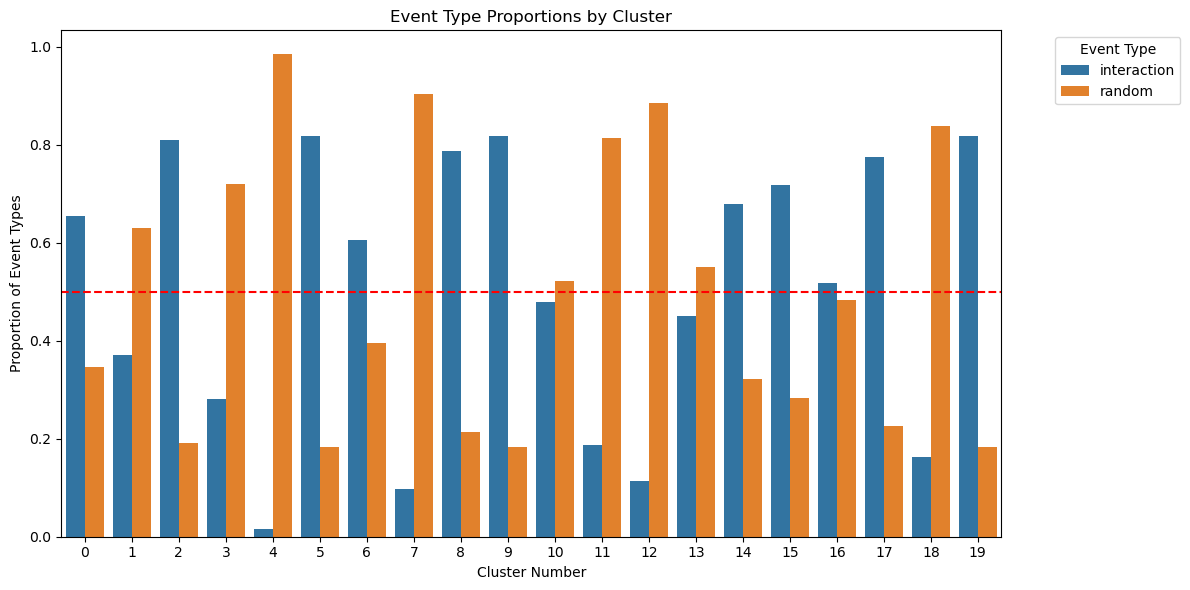

In [28]:
# Get unique clusters
unique_clusters = Umap["cluster"].unique()

# Initialize a DataFrame to store the proportions
proportions_df = pd.DataFrame()

# Process each cluster
for cluster_id in unique_clusters:
    cluster_data = Umap[Umap["cluster"] == cluster_id]
    
    # Count event types and calculate proportions
    event_counts = cluster_data["event_type"].value_counts(normalize=True).reset_index()
    event_counts.columns = ["event_type", "proportion"]
    event_counts["cluster"] = cluster_id
    
    # Append to the proportions DataFrame
    proportions_df = pd.concat([proportions_df, event_counts], ignore_index=True)

# Plot event type proportions as bar plots
plt.figure(figsize=(12, 6))
sns.barplot(data=proportions_df, x="cluster", y="proportion", hue="event_type")
plt.axhline(0.5, color='red', linestyle='--')
plt.title("Event Type Proportions by Cluster")
plt.xlabel("Cluster Number")
plt.ylabel("Proportion of Event Types")
plt.legend(title="Event Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig(f"{output_dir}/event_type_proportions_by_cluster.png")
plt.show()
plt.close()

/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


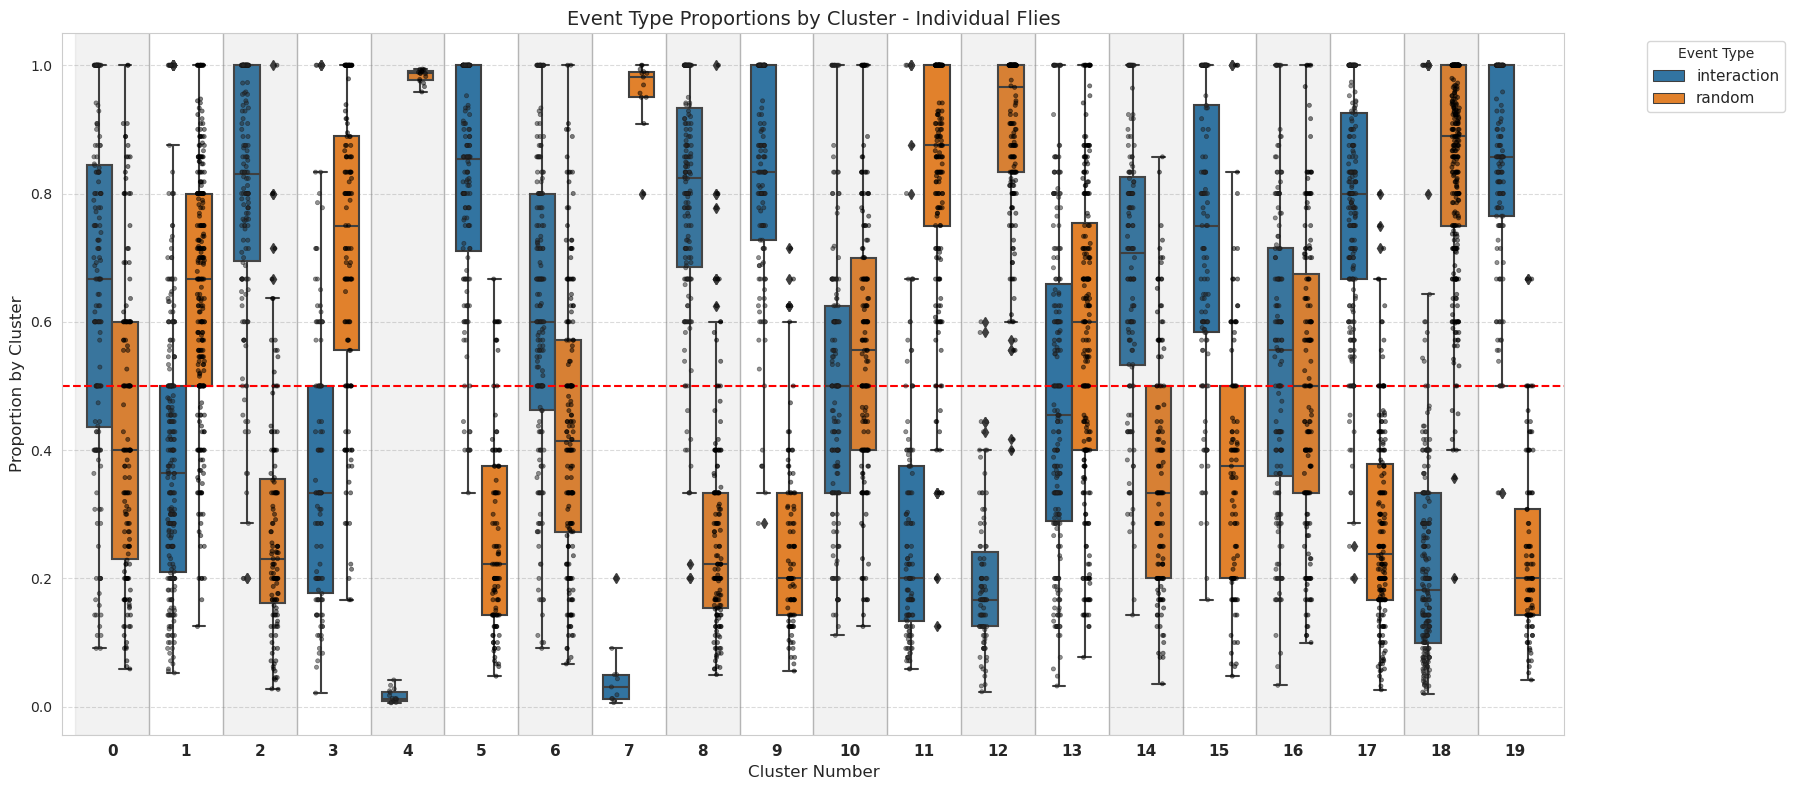

In [160]:
# Get unique clusters
unique_clusters = Umap["cluster"].unique()

# Initialize a DataFrame to store the individual fly proportions
fly_proportions_df = pd.DataFrame()

# Process each cluster and fly combination
for cluster_id in unique_clusters:
    cluster_data = Umap[Umap["cluster"] == cluster_id]
    
    # Get unique flies in this cluster
    unique_flies = cluster_data["fly"].unique()
    
    for fly_id in unique_flies:
        # Get data for this specific fly and cluster
        fly_cluster_data = cluster_data[cluster_data["fly"] == fly_id]
        
        # Only process if we have enough data points for this fly
        if len(fly_cluster_data) >= 5:  # Minimum threshold to calculate meaningful proportion
            # Count direction types and calculate proportions
            event_type_counts = fly_cluster_data["event_type"].value_counts(normalize=True).reset_index()
            event_type_counts.columns = ["event_type", "proportion"]
            event_type_counts["cluster"] = cluster_id
            event_type_counts["fly"] = fly_id
            
            # Append to the proportions DataFrame
            fly_proportions_df = pd.concat([fly_proportions_df, event_type_counts], ignore_index=True)

# Get unique event types and specify their order
event_types = sorted(fly_proportions_df["event_type"].unique())
clusters = sorted(fly_proportions_df["cluster"].unique())

# Create figure with more width to accommodate separations
plt.figure(figsize=(18, 8))  # Increased width

# Set style for better grid visibility
sns.set_style("whitegrid")

# Add boxplot with explicit order
ax = sns.boxplot(
    data=fly_proportions_df, 
    x="cluster", 
    y="proportion", 
    hue="event_type",
    hue_order=event_types,
    width=0.7  # Slightly narrower boxes
)

# Add stripplot with the SAME order
sns.stripplot(
    data=fly_proportions_df, 
    x="cluster", 
    y="proportion", 
    hue="event_type",
    hue_order=event_types,
    color='black',
    dodge=True, 
    size=3, 
    alpha=0.5,
    edgecolor='gray',
    linewidth=0.5
)

# Add vertical lines between cluster groups
for i in range(len(clusters)-1):
    plt.axvline(x=i+0.5, color='gray', linestyle='-', alpha=0.5, linewidth=1)

# Add alternating background for easier visual grouping
for i in range(len(clusters)):
    if i % 2 == 0:  # Every other cluster gets a light background
        plt.axvspan(i-0.5, i+0.5, alpha=0.1, color='gray')

# Set proper grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', visible=False)  # Remove default x grid

plt.axhline(0.5, color='red', linestyle='--', label="Equal proportion")
plt.title("Event Type Proportions by Cluster - Individual Flies", fontsize=14)
plt.xlabel("Cluster Number", fontsize=12)
plt.ylabel("Proportion by Cluster", fontsize=12)

# Improve x-axis labels
plt.xticks(range(len(clusters)), [str(c) for c in clusters], fontsize=11, fontweight='bold')

# Create a better legend (only keep one set)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:len(event_types)], labels[:len(event_types)], 
           title="Event Type", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)

plt.tight_layout()
# Save the plot
plt.savefig(f"{output_dir}/proportions_by_cluster_individual_flies.png")
plt.show()
plt.close()

# Check clusters composition for ligh conditions

In [ ]:
# With the Light subset, compare the event type proportions between light on and light off conditions

# Get unique clusters
unique_clusters = Umap_light["cluster"].unique()

# Initialize a DataFrame to store the proportions
proportions_df_Light = pd.DataFrame()

# Process each cluster
for cluster_id in unique_clusters:
    cluster_data = Umap_light[Umap_light["cluster"] == cluster_id]

    # Count event types and calculate proportions
    event_counts = (
        cluster_data.groupby("Light")["event_type"]
        .value_counts(normalize=True)
        .reset_index(name="proportion")
    )
    event_counts["cluster"] = cluster_id

    # Append to the proportions DataFrame
    proportions_df_Light = pd.concat(
        [proportions_df_Light, event_counts], ignore_index=True
    )

# Plot event type proportions as bar plots
plt.figure(figsize=(12, 6))
sns.barplot(data=proportions_df_Light, x="cluster", y="proportion", hue="Light")
plt.axhline(0.5, color="red", linestyle="--")
plt.title("Event Type Proportions by Cluster")
plt.xlabel("Cluster Number")
plt.ylabel("Proportion of Event Types")
plt.legend(title="Light Condition", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Save the plot
# plt.savefig(f"{output_dir}/event_type_proportions_by_cluster.png")
plt.show()
plt.close()

# Individual features plotting

Let's check which features might be dominant in pulling apart the events

In [ ]:
# Load the transformed data 

Transformed = pd.read_feather("/mnt/upramdya_data/MD/MultiMazeRecorder/Datasets/250220_StdContacts_Ctrl_Data/Transformed/230704_FeedingState_1_AM_Videos_Tracked_standardized_contacts_Transformed.feather")

In [ ]:
Transformed["unique_id"] = Transformed["fly"].astype(str) + "_" + Transformed["event_type"] + "_" + Transformed["event_id"].astype(str)

In [ ]:
# Get one cluster and the corresponding transformed data

cluster_0 = Umap[Umap["cluster"] == 0]

cluster_0_transformed = Transformed[Transformed["unique_id"].isin(cluster_0["unique_id"])]
cluster_0_transformed.head()

In [ ]:
# Replace Nans with 9999

cluster_0_transformed = cluster_0_transformed.fillna(9999)

In [ ]:
# Get the list of features

feature_groups=['tracking', 'frame']

# Feature selection configuration
feature_config = {
    'tracking': [r'_frame\d+_x$', r'_frame\d+_y$'],
    'frame': [r'_frame\d+_velocity$', r'_frame\d+_angle$']
}


print("Excluding ball features...")

# Remove features that have "centre" in their name
feature_config['tracking'] = [f for f in feature_config['tracking'] if 'centre' not in f]
feature_config['frame'] = [f for f in feature_config['frame'] if 'centre' not in f]

# Create combined regex pattern
regex_parts = []
for group in feature_groups:
    regex_parts.extend(feature_config.get(group, []))
feature_pattern = '|'.join(regex_parts)

# Extract features and metadata
feature_columns = cluster_0_transformed.filter(regex=feature_pattern).columns
if len(feature_columns) == 0:
    raise ValueError("No features found matching the selected feature groups")
    
features = cluster_0_transformed[feature_columns].values
event_indices = cluster_0_transformed['event_id'] if 'event_id' in cluster_0_transformed.columns else pd.Series([None]*len(cluster_0_transformed))
metadata = cluster_0_transformed.drop(columns=feature_columns).drop(columns=['event_id'], errors='ignore')

In [ ]:
x_fly_pattern = r"^x_.*_fly$"
y_fly_pattern = r"^y_.*_fly$"


In [ ]:
# Now using cluster 0 interaction data we could plot each keypoint position over time, which are x_bodypart and y_bodypart columns in the interaction data
keypoints = cluster_0_interactions.filter(regex=f"{x_fly_pattern}|{y_fly_pattern}")
keypoints.head()

In [ ]:
# Add the adjusted frame column

keypoints["adjusted_frame"] = cluster_0_interactions["adjusted_frame"]

In [ ]:
keypoints

In [ ]:
# Now for each column plot average value over adjusted_frame

# For instance, get the x_Abdomen_fly

sns.lineplot(data=keypoints, x="adjusted_frame", y="x_Lfront_fly", estimator="mean")

# Clusters over time and interaction 

First we're gonna select one condition of starvation and light to minimise variability

In [29]:
Umap["Light"].unique()

array(['on', 'off', ''], dtype=object)

In [30]:
Umap["FeedingState"].unique()

array(['starved', 'starved_noWater', 'fed', 'Fed', ''], dtype=object)

In [31]:
Subset = Umap[Umap["Light"].isin(["on"]) & Umap["FeedingState"].isin(["starved_noWater"])]


In [41]:
bin_metric(Subset, "start", 10)

/tmp/ipykernel_2325728/2928321926.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"binned_{metric}"] = pd.cut(df[column], bins=bins, labels=False)


UMAP1     UMAP2  duration  \
438    0.565710 -1.273178       300   
439   -4.622505  6.439818       300   
440    1.349943 -1.439613       300   
441    3.407645  9.195754       300   
442   -5.211839  1.224313       300   
...         ...       ...       ...   
49525 -0.744041 -1.045398       300   
49526 -6.480713  2.545859       300   
49527 -2.451590 -1.517644       300   
49528 -5.996283  0.511616       300   
49529  5.249425  3.050026       300   

                                                     fly   event_type  \
438    230704_FeedingState_1_PM_Videos_Tracked_arena3...       random   
439    230704_FeedingState_1_PM_Videos_Tracked_arena3...  interaction   
440    230704_FeedingState_1_PM_Videos_Tracked_arena3...       random   
441    230704_FeedingState_1_PM_Videos_Tracked_arena3...  interaction   
442    230704_FeedingState_1_PM_Videos_Tracked_arena3...       random   
...                                                  ...          ...   
49525  230705_FeedingState_2_PM_Videos_Tracked_arena1...       random   
49526  230705_FeedingState_2_PM_Videos_Tracked_arena1...  interaction   
49527  230705_FeedingState_2_PM_Videos_Tracked_arena1...       random   
49528  230705_FeedingState_2_PM_Videos_Tracked_arena1...  interaction   
49529  230705_FeedingState_2_PM_Videos_Tracked_arena1...       random   

             start          end  start_frame  end_frame  \
438    4683.172414  4693.482759       135812     136111   
439     668.793103   679.103448        19395      19694   
440     425.275862   435.586207        12333      12632   
441     453.827586   464.137931        13161      13460   
442    2260.275862  2270.586207        65548      65847   
...            ...          ...          ...        ...   
49525  1758.379310  1768.689655        50993      51292   
49526  7258.517241  7268.827586       210497     210796   
49527  6818.931034  6829.241379       197749     198048   
49528  7313.517241  7323.827586       212092     212391   
49529   282.172414   292.482759         8183       8482   

       x_centre_preprocessed_fly_vel_mean  ...  Genotype  Period  \
438                             -0.042959  ...        PR      PM   
439                             -0.092989  ...        PR      PM   
440                              0.086275  ...        PR      PM   
441                              0.475864  ...        PR      PM   
442                              0.422351  ...        PR      PM   
...                                   ...  ...       ...     ...   
49525                            0.505289  ...        PR      PM   
49526                            0.367943  ...        PR      PM   
49527                           -0.003069  ...        PR      PM   
49528                           -0.153039  ...        PR      PM   
49529                            0.180652  ...        PR      PM   

          FeedingState  Orientation  Light  Crossing  event_id  cluster  \
438    starved_noWater          std     on      None         3       18   
439    starved_noWater          std     on      None         3       15   
440    starved_noWater          std     on      None         1       18   
441    starved_noWater          std     on      None         2       19   
442    starved_noWater          std     on      None         2       17   
...                ...          ...    ...       ...       ...      ...   
49525  starved_noWater          std     on      None        32       18   
49526  starved_noWater          std     on      None        33       17   
49527  starved_noWater          std     on      None        33       12   
49528  starved_noWater          std     on      None        34       17   
49529  starved_noWater          std     on      None        34       13   

                                               unique_id  binned_start  
438    230704_FeedingState_1_PM_Videos_Tracked_arena3...             6  
439    230704_FeedingState_1_PM_Videos_Tracked_arena3...             0  
440    230704_Feed

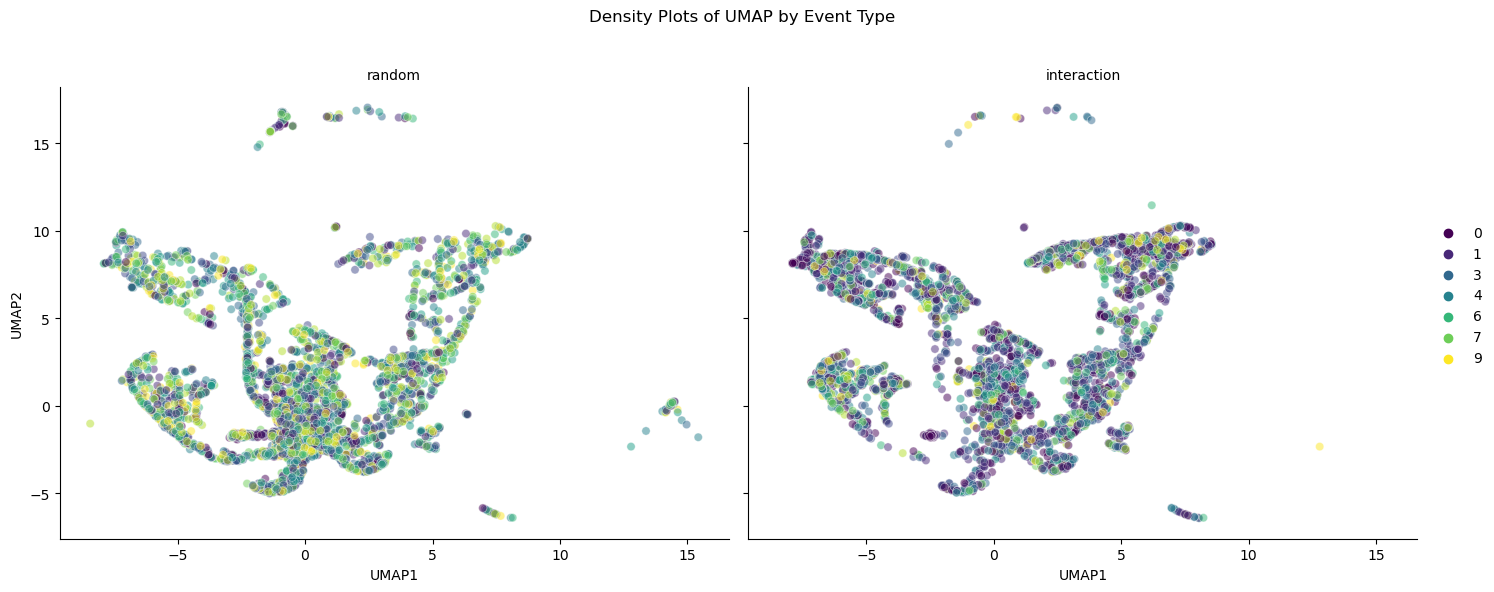

In [42]:
# Plot side by side the umap values of event_type interaction and random with hue being the binned_end_distance
# Create a FacetGrid with two columns, one for each event_type
g = sns.FacetGrid(
    Subset,
    col="event_type",
    sharex=True,
    sharey=True,
    height=6,
    aspect=1.2,
)

# Map the scatterplot to the FacetGrid
g.map_dataframe(
    sns.scatterplot,
    x="UMAP1",
    y="UMAP2",
    hue="binned_start",
    alpha=0.5,
    palette="viridis",
)

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Density Plots of UMAP by Event Type")

# Save the plot
plt.savefig(f"{output_dir}/UMAP_event_types_overtime_starttime.png")
plt.show()
plt.close()

In [43]:
# Calculate cluster proportions over time by event type
cluster_proportions = (Subset
                      .groupby(['event_type', 'binned_start', 'cluster'])
                      .size()
                      .reset_index(name='count'))

# Calculate totals for proportions
totals = (cluster_proportions
         .groupby(['event_type', 'binned_start'])['count']
         .sum()
         .reset_index(name='total'))

# Merge and calculate proportions
cluster_proportions = cluster_proportions.merge(
    totals, on=['event_type', 'binned_start'])
cluster_proportions['proportion'] = cluster_proportions['count'] / cluster_proportions['total']

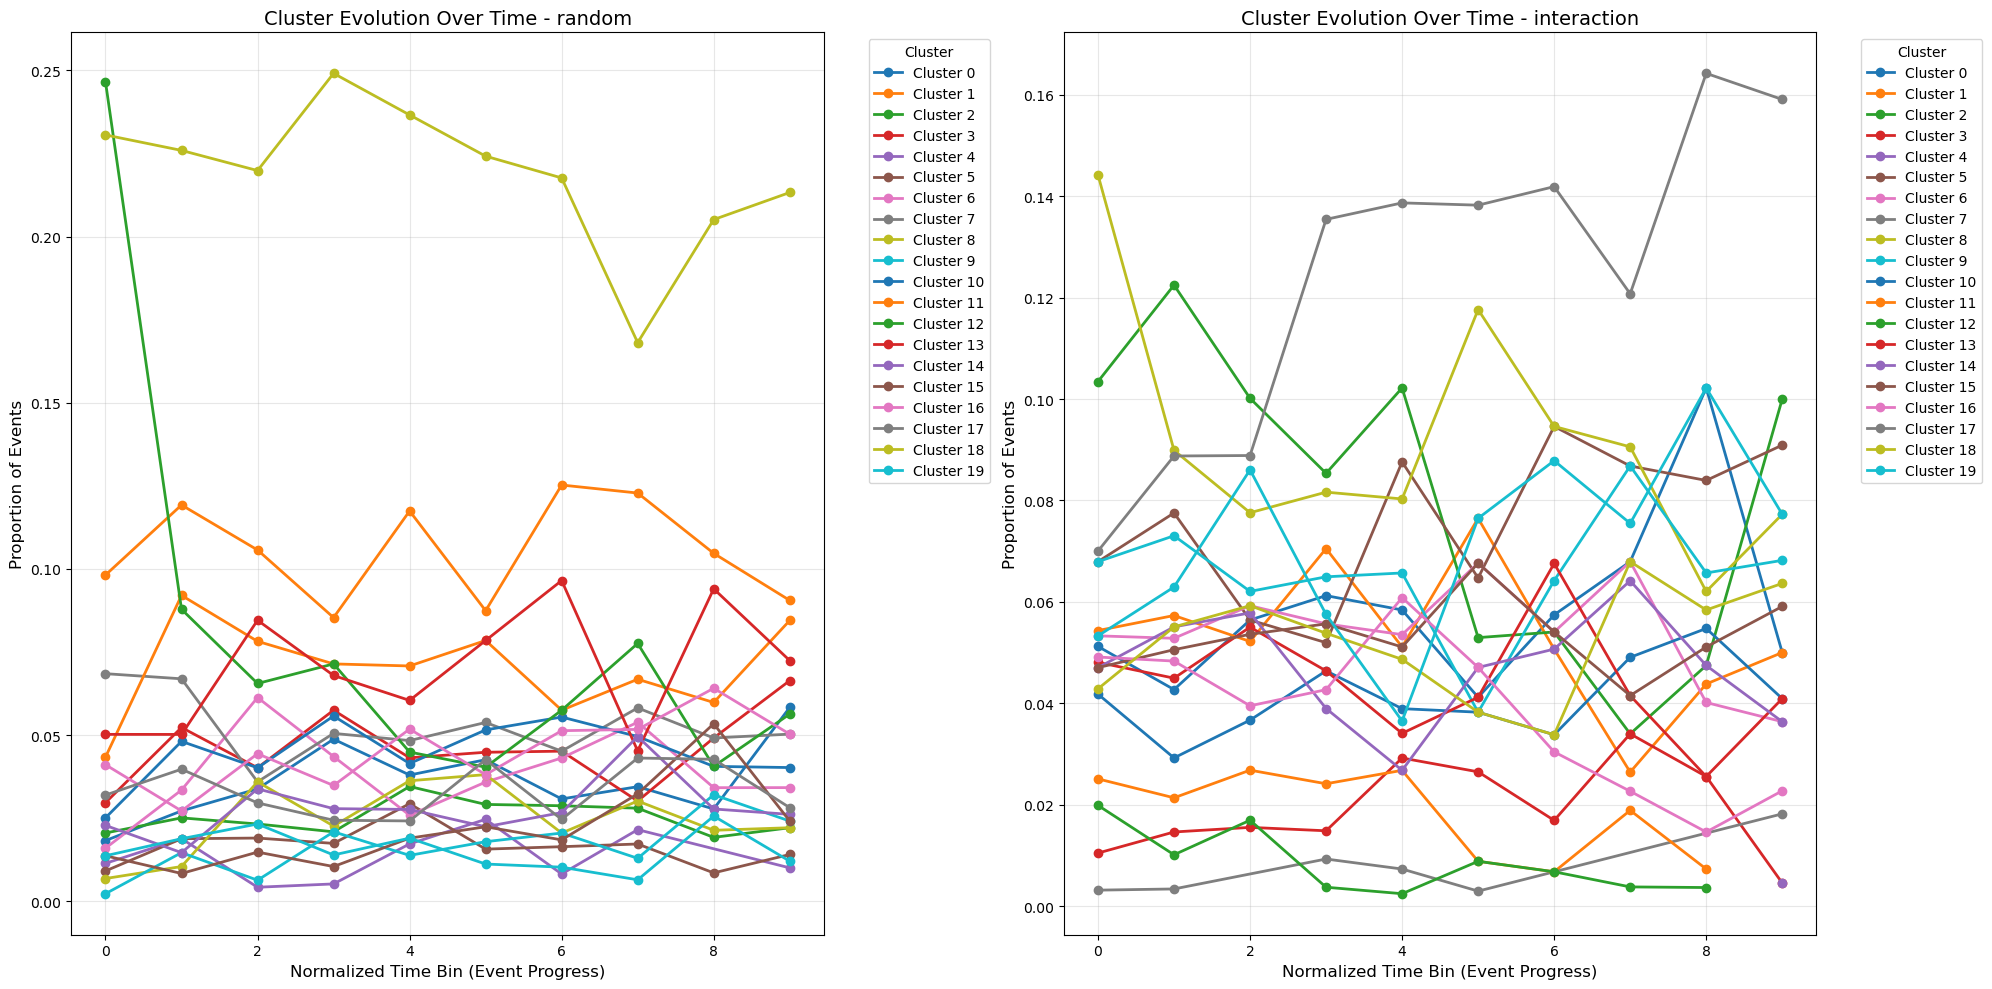

In [44]:
plt.figure(figsize=(20, 10))

for i, event_type in enumerate(Subset["event_type"].unique()):
    plt.subplot(1, 2, i + 1)

    # Filter to just this event type
    event_data = cluster_proportions[cluster_proportions["event_type"] == event_type]

    # Plot a line for each cluster
    for cluster in sorted(Subset["cluster"].unique()):
        cluster_data = event_data[event_data["cluster"] == cluster]
        if not cluster_data.empty:
            plt.plot(
                cluster_data["binned_start"],
                cluster_data["proportion"],
                marker="o",
                linewidth=2,
                label=f"Cluster {cluster}",
            )

    plt.title(f"Cluster Evolution Over Time - {event_type}", fontsize=14)
    plt.xlabel("Normalized Time Bin (Event Progress)", fontsize=12)
    plt.ylabel("Proportion of Events", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.savefig(f"{output_dir}/cluster_evolution_line_plots.png")
plt.show()

In [45]:
# Calculate cluster proportions over time by event type AND fly
fly_cluster_proportions = (
    Subset.groupby(["fly", "event_type", "binned_start", "cluster"])
    .size()
    .reset_index(name="count")
)

# Calculate totals for proportions (per fly and time bin)
fly_totals = (
    fly_cluster_proportions.groupby(["fly", "event_type", "binned_start"])["count"]
    .sum()
    .reset_index(name="total")
)

# Merge and calculate proportions
fly_cluster_proportions = fly_cluster_proportions.merge(
    fly_totals, on=["fly", "event_type", "binned_start"]
)
fly_cluster_proportions["proportion"] = (
    fly_cluster_proportions["count"] / fly_cluster_proportions["total"]
)

/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.1

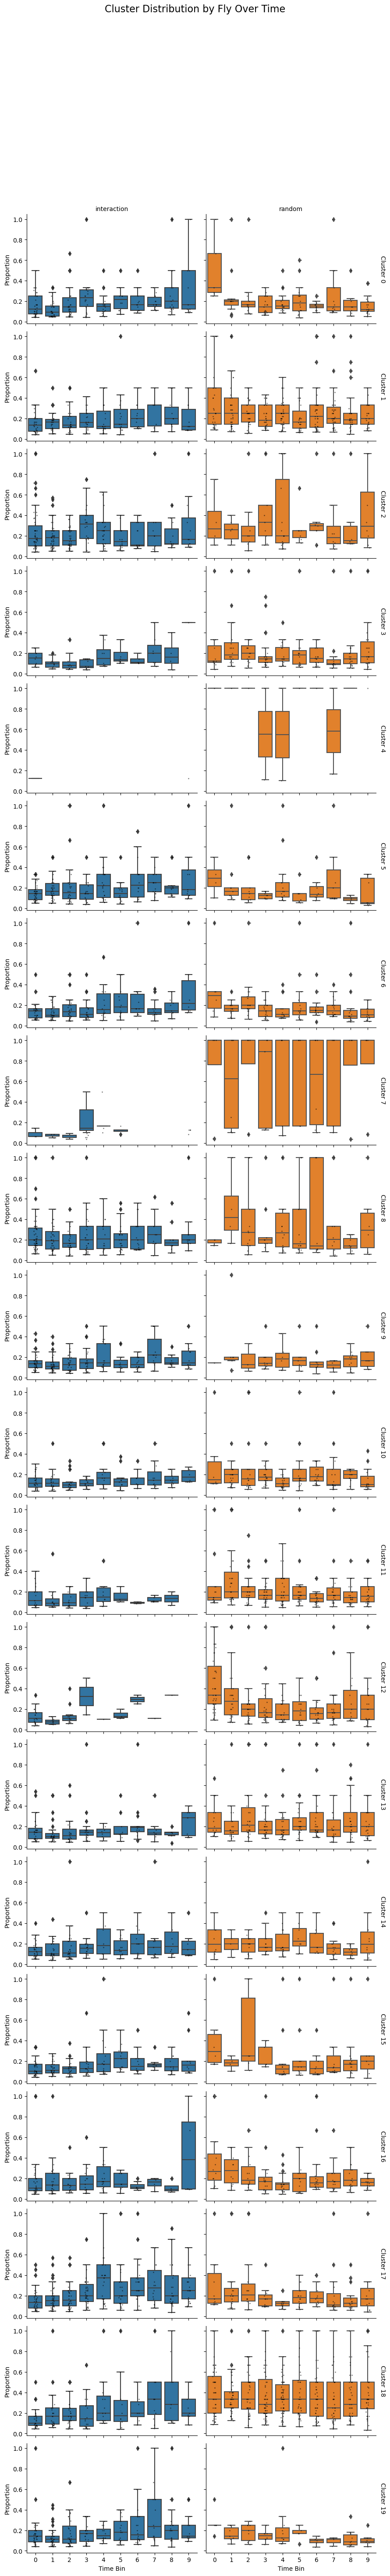

In [118]:
# Create a facet grid of box plots
g = sns.FacetGrid(
    fly_cluster_proportions,
    col="event_type",
    hue="event_type",
    row="cluster",
    margin_titles=True,
    height=3,
    aspect=1.5,
    palette="tab10",
)

# Map the box plot
g.map_dataframe(sns.boxplot, x="binned_start", y="proportion")

# Add strip plot to show individual fly points
g.map_dataframe(
    sns.stripplot,
    x="binned_start",
    y="proportion",
    color="black",
    size=2,
    alpha=0.5,
    jitter=True,
)

# Add titles and labels
g.set_axis_labels("Time Bin", "Proportion")
g.set_titles(col_template="{col_name}", row_template="Cluster {row_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Cluster Distribution by Fly Over Time", fontsize=16)

plt.savefig(f"{output_dir}/cluster_evolution_by_fly_box_plots.png")
plt.show()

## Statistical analysis of cluster evolution

In [161]:
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
from statsmodels.stats.multitest import multipletests
from scipy import stats
import numpy as np
from itertools import combinations

# Function to get pairwise p-values from the model results
def get_pairwise_pvalues(model_result, time_bins):
    pairs = list(combinations(time_bins, 2))
    p_values = {}
    
    # Extract parameter estimates and covariance matrix
    params = model_result.params
    cov_params = model_result.cov_params()
    
    for bin1, bin2 in pairs:
        # Handle parameter naming based on bin values
        if bin1 == 0:
            param1_name = 'Intercept'
        else:
            param1_name = f'binned_start_cat[T.{bin1}]'
        
        if bin2 == 0:
            param2_name = 'Intercept'
        else:
            param2_name = f'binned_start_cat[T.{bin2}]'
        
        # Calculate difference and standard error
        if bin1 == 0:
            diff = -params[param2_name]
            se = np.sqrt(cov_params.loc[param2_name, param2_name])
        elif bin2 == 0:
            diff = params[param1_name]
            se = np.sqrt(cov_params.loc[param1_name, param1_name])
        else:
            diff = params[param1_name] - params[param2_name]
            se = np.sqrt(
                cov_params.loc[param1_name, param1_name] +
                cov_params.loc[param2_name, param2_name] -
                2 * cov_params.loc[param1_name, param2_name]
            )
        
        # Calculate t-statistic and p-value
        t_stat = diff / se
        p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=model_result.df_resid))
        p_values[(bin1, bin2)] = p_value
        
    return p_values

# Function to add significance bars to the plot
def add_significance_bars(ax, time_bins, p_values, max_y):
    y_offset = max_y * 0.05
    y_spacing = max_y * 0.07
    
    # Sort pairs by distance for better visualization
    pairs = sorted(p_values.keys(), key=lambda x: abs(x[0] - x[1]))
    
    for i, (bin1, bin2) in enumerate(pairs):
        p_val = p_values[(bin1, bin2)]
        
        if p_val < 0.05:
            # Get x-coordinates (positions)
            x1 = time_bins.index(bin1)
            x2 = time_bins.index(bin2)
            
            # Draw the significance bar
            bar_y = max_y + y_spacing * i
            ax.plot([x1, x2], [bar_y, bar_y], 'k-', linewidth=1.5)
            
            # Add asterisks based on significance level
            if p_val < 0.001:
                sig_symbol = '***'
            elif p_val < 0.01:
                sig_symbol = '**'
            else:
                sig_symbol = '*'
                
            ax.text((x1 + x2) * 0.5, bar_y + 0.01, sig_symbol, ha='center')
    
    # Adjust y-axis limit to show all bars
    if p_values:
        ax.set_ylim(0, max_y + y_spacing * (len(pairs) + 1))

/tmp/ipykernel_2325728/1368072626.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['binned_start_cat'] = data['binned_start'].astype('category')
/tmp/ipykernel_2325728/1368072626.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['binned_start_cat'] = data['binned_start'].astype('category')
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
 

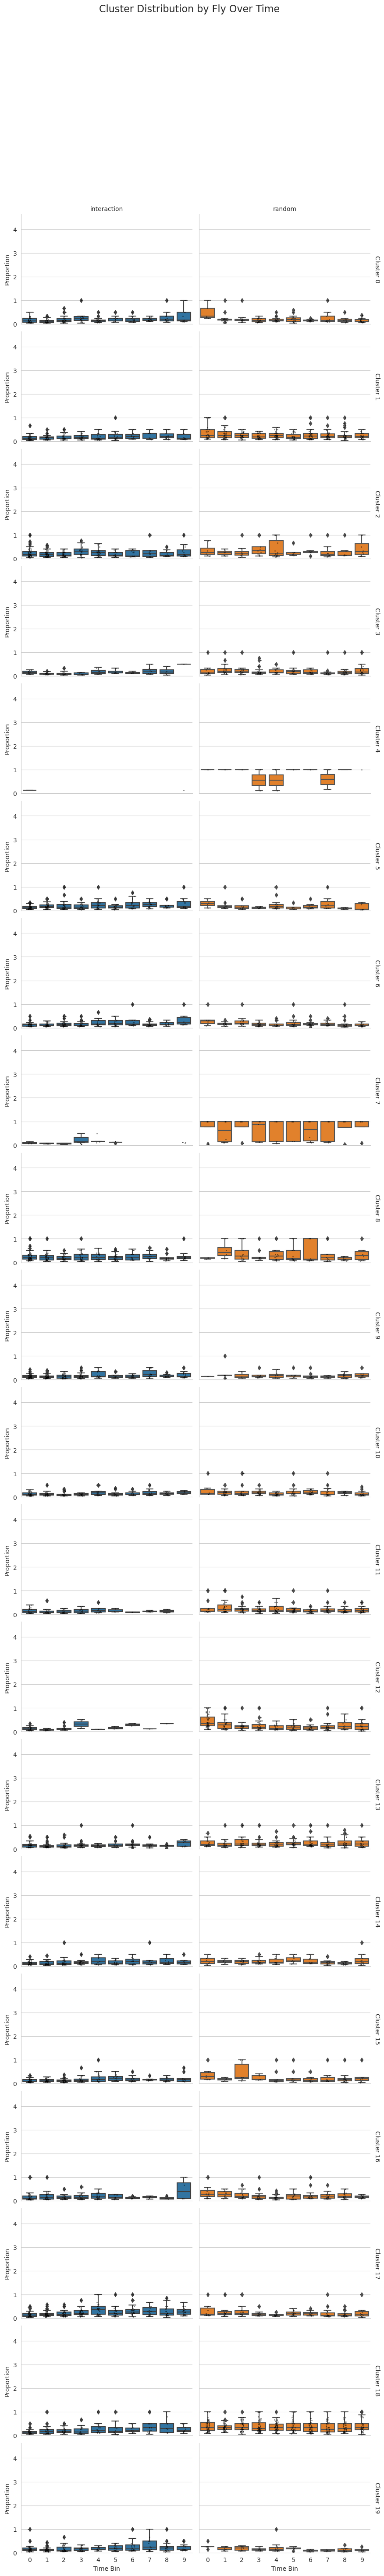

In [163]:
# Run mixed effects models for each cluster and event type
results_dict = {}
all_pvalues = []
pvalue_identifiers = []

# For each cluster and event type combination
for cluster in sorted(Subset["cluster"].unique()):
    for event_type in Subset["event_type"].unique():
        data = fly_cluster_proportions[
            (fly_cluster_proportions["cluster"] == cluster) & 
            (fly_cluster_proportions["event_type"] == event_type)
        ]
        
        if len(data) > 0:
            # Convert binned_start to categorical for the model
            data['binned_start_cat'] = data['binned_start'].astype('category')
            
            # Fit mixed effects model with fly as random effect
            try:
                model = mixedlm("proportion ~ binned_start_cat", data, groups=data["fly"])
                result = model.fit()
                
                # Store results
                results_dict[(cluster, event_type)] = result
                
                # Get time bins
                time_bins = sorted(data['binned_start'].unique())
                
                # Calculate pairwise p-values
                pairwise_pvals = get_pairwise_pvalues(result, time_bins)
                
                # Collect p-values for multiple testing correction
                for pair, p_val in pairwise_pvals.items():
                    all_pvalues.append(p_val)
                    pvalue_identifiers.append((cluster, event_type, pair))
                
            except Exception as e:
                print(f"Error fitting model for Cluster {cluster}, Event Type {event_type}: {e}")
                continue

# Apply FDR correction for multiple testing
if all_pvalues:
    reject, p_corrected, _, _ = multipletests(all_pvalues, alpha=0.05, method='fdr_bh')
    
    # Create dictionary of corrected p-values
    corrected_pvalues = {}
    for (cluster, event_type, pair), p_val in zip(pvalue_identifiers, p_corrected):
        if (cluster, event_type) not in corrected_pvalues:
            corrected_pvalues[(cluster, event_type)] = {}
        corrected_pvalues[(cluster, event_type)][pair] = p_val

# Create your FacetGrid as before
g = sns.FacetGrid(
    fly_cluster_proportions,
    col="event_type",
    hue="event_type",
    row="cluster",
    margin_titles=True,
    height=3,
    aspect=1.5,
    palette="tab10",
)

# Map the box plot
g.map_dataframe(sns.boxplot, x="binned_start", y="proportion")

# Add strip plot
g.map_dataframe(
    sns.stripplot,
    x="binned_start",
    y="proportion",
    color="black",
    size=2,
    alpha=0.5,
    jitter=True,
)

# Add significance annotations to each subplot
# Get row and column names from the FacetGrid
row_names = g.row_names  # These should be your cluster values
col_names = g.col_names  # These should be your event_type values

# Iterate through rows (clusters) and columns (event_types)
for i, cluster in enumerate(row_names):
    for j, event_type in enumerate(col_names):
        # Get the current axis
        ax = g.axes[i, j]
        
        # Convert cluster from string to number if needed
        if isinstance(cluster, str) and cluster.isdigit():
            cluster = int(cluster)
            
        # Check if we have statistical results for this combination
        if (cluster, event_type) in corrected_pvalues:
            data = fly_cluster_proportions[
                (fly_cluster_proportions["cluster"] == cluster) & 
                (fly_cluster_proportions["event_type"] == event_type)
            ]
            
            time_bins = sorted(data['binned_start'].unique())
            max_y = data['proportion'].max() * 1.1
            
            add_significance_bars(
                ax, 
                time_bins, 
                corrected_pvalues[(cluster, event_type)], 
                max_y
            )

# Complete the plot formatting
g.set_axis_labels("Time Bin", "Proportion")
g.set_titles(col_template="{col_name}", row_template="Cluster {row_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Cluster Distribution by Fly Over Time", fontsize=16)

plt.savefig(f"{output_dir}/cluster_evolution_by_fly_box_plots_with_stats.png")
plt.show()

In [164]:
p_corrected

array([nan, nan, nan, ..., nan, nan, nan])

/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


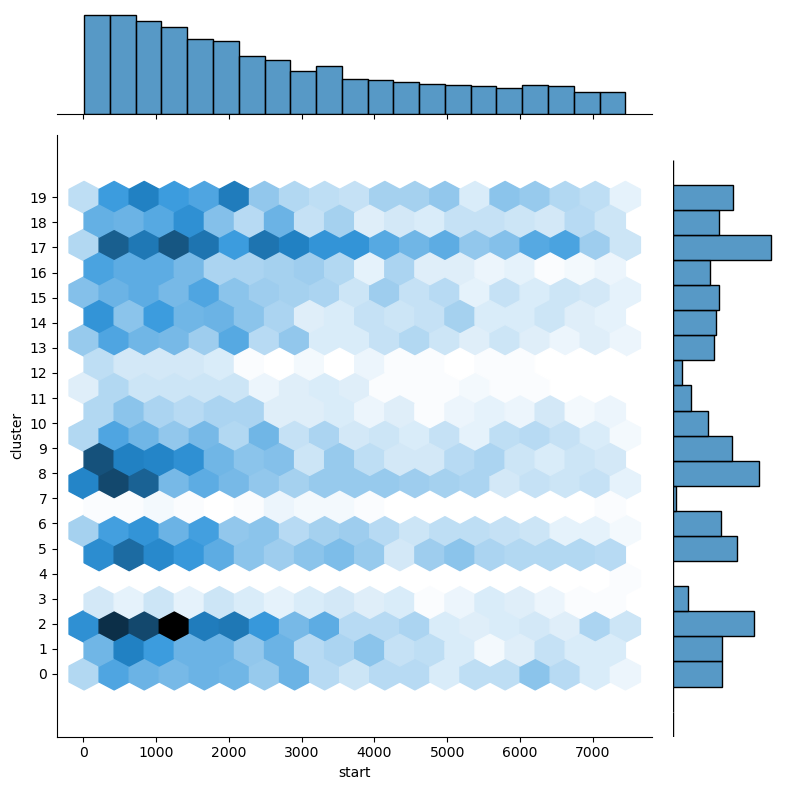

In [107]:
Subset_interaction = Subset[Subset["event_type"] == "interaction"]


# Create the jointplot and save the grid object
g = sns.jointplot(data=Subset_interaction, x="start", y="cluster", kind="hex", height=8)

# Find min and max cluster values for proper range setting
cluster_min = Subset_interaction["cluster"].min()
cluster_max = Subset_interaction["cluster"].max()

# Clear and recreate the y-marginal histogram with precise bins
g.ax_marg_y.clear()
clusters = sorted(Subset_interaction["cluster"].unique())

bins = np.arange(cluster_min-2.5, cluster_max+2.5, 1)  # This creates exact bin edges

# Use sns.histplot for better styling
sns.histplot(y=Subset_interaction["cluster"], bins=bins, ax=g.ax_marg_y,
             kde=False, edgecolor='black', linewidth=1)

g.ax_joint.set_ylim(cluster_min-2.5, cluster_max+2.5)

# Set the y-ticks on main plot
g.ax_joint.set_yticks(range(cluster_min, cluster_max+1))
g.ax_joint.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))

# Completely disable ticks on the marginal plot
g.ax_marg_y.tick_params(axis='both', which='both', length=0, width=0, 
                        labelleft=False, left=False, 
                        labelbottom=False, bottom=False)

# Remove the spines for a cleaner look on the marginal plot
for spine in g.ax_marg_y.spines.values():
    spine.set_visible(False)

# Remove axis labels from the marginal plot
g.ax_marg_y.set_xlabel('')
g.ax_marg_y.set_ylabel('')

# Do the same for the top histogram
g.ax_marg_x.set_xlabel('')
g.ax_marg_x.set_ylabel('')

plt.savefig(f"{output_dir}/cluster_evolution_jointplot_Interaction.png")

/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


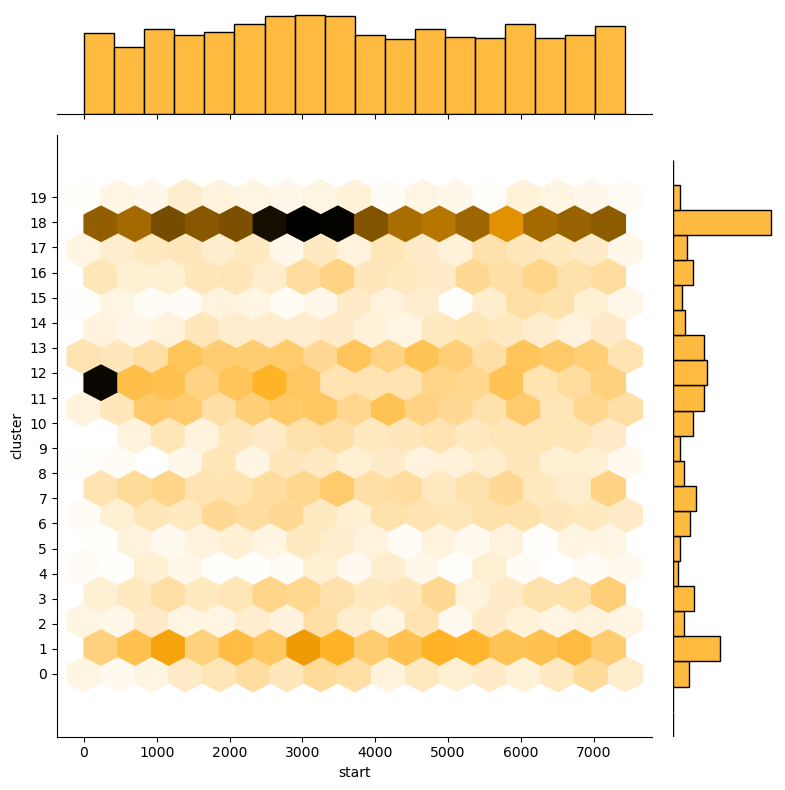

In [109]:
Subset_random = Subset[Subset["event_type"] == "random"]

# Create the jointplot and save the grid object
g = sns.jointplot(data=Subset_random, x="start", y="cluster", kind="hex", height=8, color="orange")

# Find min and max cluster values for proper range setting
cluster_min = Subset_random["cluster"].min()
cluster_max = Subset_random["cluster"].max()

# Clear and recreate the y-marginal histogram with precise bins
g.ax_marg_y.clear()
clusters = sorted(Subset_random["cluster"].unique())

bins = np.arange(cluster_min-2.5, cluster_max+2.5, 1)  # This creates exact bin edges

# Use sns.histplot for better styling
sns.histplot(y=Subset_random["cluster"], bins=bins, ax=g.ax_marg_y,
             kde=False, edgecolor='black', linewidth=1, color="orange")

g.ax_joint.set_ylim(cluster_min-2.5, cluster_max+2.5)

# Set the y-ticks on main plot
g.ax_joint.set_yticks(range(cluster_min, cluster_max+1))
g.ax_joint.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))

# Completely disable ticks on the marginal plot
g.ax_marg_y.tick_params(axis='both', which='both', length=0, width=0, 
                        labelleft=False, left=False, 
                        labelbottom=False, bottom=False)

# Remove the spines for a cleaner look on the marginal plot
for spine in g.ax_marg_y.spines.values():
    spine.set_visible(False)

# Remove axis labels from the marginal plot
g.ax_marg_y.set_xlabel('')
g.ax_marg_y.set_ylabel('')

# Do the same for the top histogram
g.ax_marg_x.set_xlabel('')
g.ax_marg_x.set_ylabel('')

plt.savefig(f"{output_dir}/cluster_evolution_jointplot_Random.png")

## Checking clusters "efficiency"

/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:111

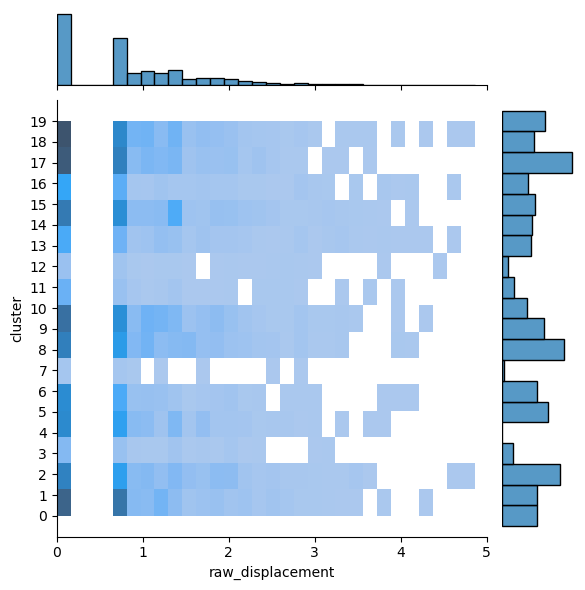

In [111]:
Subset_interaction = Subset[Subset["event_type"] == "interaction"]

# Create the jointplot and save the grid object
g = sns.jointplot(data=Subset_interaction, x=np.log1p(Subset_interaction["raw_displacement"]), y="cluster", kind="hist")

# Find min and max cluster values for proper range setting
cluster_min = Subset_interaction["cluster"].min()
cluster_max = Subset_interaction["cluster"].max()

# Clear and recreate the y-marginal histogram with precise bins
g.ax_marg_y.clear()
clusters = sorted(Subset_interaction["cluster"].unique())
bins = np.arange(min(clusters)-0.5, max(clusters)+1.5, 1)

# Use sns.histplot for better styling
sns.histplot(y=Subset_interaction["cluster"], bins=bins, ax=g.ax_marg_y,
             kde=False, edgecolor='black', linewidth=1)

# Set the y-axis limits on main plot
g.ax_joint.set_ylim(cluster_min-1, cluster_max+1)

# Set the y-ticks on main plot
g.ax_joint.set_xlim(0, 5)

# Set the y-ticks on main plot
g.ax_joint.set_yticks(range(cluster_min, cluster_max+1))
g.ax_joint.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))

# Completely disable ticks on the marginal plot
g.ax_marg_y.tick_params(axis='both', which='both', length=0, width=0, 
                        labelleft=False, left=False, 
                        labelbottom=False, bottom=False)

# Remove the spines for a cleaner look on the marginal plot
for spine in g.ax_marg_y.spines.values():
    spine.set_visible(False)

# Remove axis labels from the marginal plot
g.ax_marg_y.set_xlabel('')
g.ax_marg_y.set_ylabel('')

# Do the same for the top histogram
g.ax_marg_x.set_xlabel('')
g.ax_marg_x.set_ylabel('')

plt.savefig(f"{output_dir}/cluster_efficiency_jointplot_Interaction.png")

/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:111

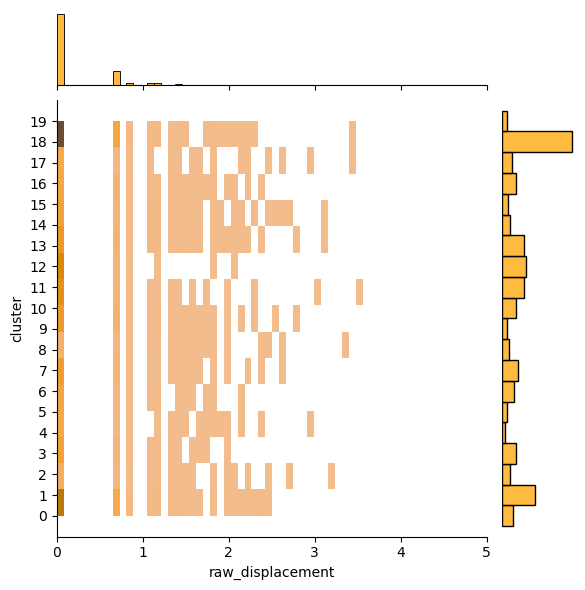

In [112]:
# Create the jointplot and save the grid object
g = sns.jointplot(data=Subset_random, x=np.log1p(Subset_random["raw_displacement"]), y="cluster", kind="hist", color="orange")

# Find min and max cluster values for proper range setting
cluster_min = Subset_random["cluster"].min()
cluster_max = Subset_random["cluster"].max()

# Clear and recreate the y-marginal histogram with precise bins
g.ax_marg_y.clear()
clusters = sorted(Subset_random["cluster"].unique())
bins = np.arange(min(clusters)-0.5, max(clusters)+1.5, 1)

# Use sns.histplot for better styling
sns.histplot(y=Subset_random["cluster"], bins=bins, ax=g.ax_marg_y,
             kde=False, edgecolor='black', linewidth=1, color="orange")

# Set the y-axis limits on main plot
g.ax_joint.set_ylim(cluster_min-1, cluster_max+1)

# Set the x-axis limits on main plot

g.ax_joint.set_xlim(0, 5)

# Set the y-ticks on main plot
g.ax_joint.set_yticks(range(cluster_min, cluster_max+1))
g.ax_joint.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))

# Completely disable ticks on the marginal plot
g.ax_marg_y.tick_params(axis='both', which='both', length=0, width=0, 
                        labelleft=False, left=False, 
                        labelbottom=False, bottom=False)

# Remove the spines for a cleaner look on the marginal plot
for spine in g.ax_marg_y.spines.values():
    spine.set_visible(False)

# Remove axis labels from the marginal plot
g.ax_marg_y.set_xlabel('')
g.ax_marg_y.set_ylabel('')

# Do the same for the top histogram
g.ax_marg_x.set_xlabel('')
g.ax_marg_x.set_ylabel('')

plt.savefig(f"{output_dir}/cluster_efficiency_jointplot_Random.png")

# By event_index

In [135]:
bin_metric(Subset, "event_id", 10)

/tmp/ipykernel_2325728/2928321926.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"binned_{metric}"] = pd.cut(df[column], bins=bins, labels=False)


UMAP1     UMAP2  duration  \
438    0.565710 -1.273178       300   
439   -4.622505  6.439818       300   
440    1.349943 -1.439613       300   
441    3.407645  9.195754       300   
442   -5.211839  1.224313       300   
...         ...       ...       ...   
49525 -0.744041 -1.045398       300   
49526 -6.480713  2.545859       300   
49527 -2.451590 -1.517644       300   
49528 -5.996283  0.511616       300   
49529  5.249425  3.050026       300   

                                                     fly   event_type  \
438    230704_FeedingState_1_PM_Videos_Tracked_arena3...       random   
439    230704_FeedingState_1_PM_Videos_Tracked_arena3...  interaction   
440    230704_FeedingState_1_PM_Videos_Tracked_arena3...       random   
441    230704_FeedingState_1_PM_Videos_Tracked_arena3...  interaction   
442    230704_FeedingState_1_PM_Videos_Tracked_arena3...       random   
...                                                  ...          ...   
49525  230705_FeedingState_2_PM_Videos_Tracked_arena1...       random   
49526  230705_FeedingState_2_PM_Videos_Tracked_arena1...  interaction   
49527  230705_FeedingState_2_PM_Videos_Tracked_arena1...       random   
49528  230705_FeedingState_2_PM_Videos_Tracked_arena1...  interaction   
49529  230705_FeedingState_2_PM_Videos_Tracked_arena1...       random   

             start          end  start_frame  end_frame  \
438    4683.172414  4693.482759       135812     136111   
439     668.793103   679.103448        19395      19694   
440     425.275862   435.586207        12333      12632   
441     453.827586   464.137931        13161      13460   
442    2260.275862  2270.586207        65548      65847   
...            ...          ...          ...        ...   
49525  1758.379310  1768.689655        50993      51292   
49526  7258.517241  7268.827586       210497     210796   
49527  6818.931034  6829.241379       197749     198048   
49528  7313.517241  7323.827586       212092     212391   
49529   282.172414   292.482759         8183       8482   

       x_centre_preprocessed_fly_vel_mean  ...  Period     FeedingState  \
438                             -0.042959  ...      PM  starved_noWater   
439                             -0.092989  ...      PM  starved_noWater   
440                              0.086275  ...      PM  starved_noWater   
441                              0.475864  ...      PM  starved_noWater   
442                              0.422351  ...      PM  starved_noWater   
...                                   ...  ...     ...              ...   
49525                            0.505289  ...      PM  starved_noWater   
49526                            0.367943  ...      PM  starved_noWater   
49527                           -0.003069  ...      PM  starved_noWater   
49528                           -0.153039  ...      PM  starved_noWater   
49529                            0.180652  ...      PM  starved_noWater   

       Orientation  Light  Crossing  event_id  cluster  \
438            std     on      None         3       18   
439            std     on      None         3       15   
440            std     on      None         1       18   
441            std     on      None         2       19   
442            std     on      None         2       17   
...            ...    ...       ...       ...      ...   
49525          std     on      None        32       18   
49526          std     on      None        33       17   
49527          std     on      None        33       12   
49528          std     on      None        34       17   
49529          std     on      None        34       13   

                                               unique_id  binned_start  \
438    230704_FeedingState_1_PM_Videos_Tracked_arena3...             6   
439    230704_FeedingState_1_PM_Videos_Tracked_arena3...             0   
440    230704_FeedingState_1_PM_Videos_Tracked_arena3...             0   
441    230704_FeedingState_1_PM_Videos_Tracked_arena3...     

In [136]:
Subset_FirstContacts = Subset#[Subset["event_id"] < 10]

/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


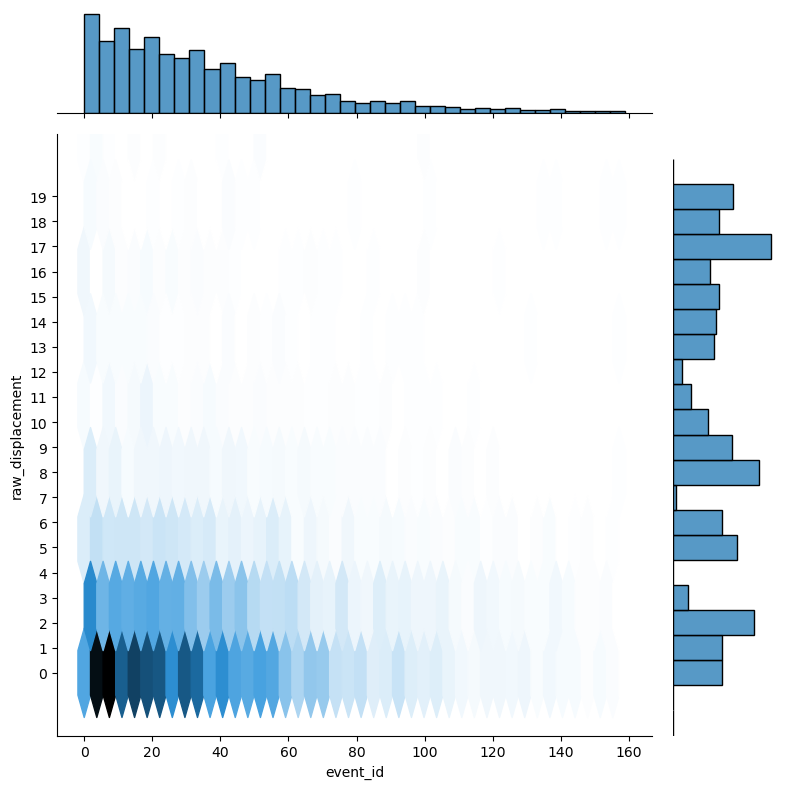

In [137]:
Subset_Subset_FirstContacts_interaction = Subset_FirstContacts[Subset_FirstContacts["event_type"] == "interaction"]


# Create the jointplot and save the grid object
g = sns.jointplot(data=Subset_Subset_FirstContacts_interaction, x="event_id", y="raw_displacement", kind="hex", height=8)

# Find min and max cluster values for proper range setting
cluster_min = Subset_Subset_FirstContacts_interaction["cluster"].min()
cluster_max = Subset_Subset_FirstContacts_interaction["cluster"].max()

# Clear and recreate the y-marginal histogram with precise bins
g.ax_marg_y.clear()
clusters = sorted(Subset_Subset_FirstContacts_interaction["cluster"].unique())

bins = np.arange(cluster_min-2.5, cluster_max+2.5, 1)  # This creates exact bin edges

# Use sns.histplot for better styling
sns.histplot(y=Subset_Subset_FirstContacts_interaction["cluster"], bins=bins, ax=g.ax_marg_y,
             kde=False, edgecolor='black', linewidth=1)

g.ax_joint.set_ylim(cluster_min-2.5, cluster_max+2.5)

# Set the y-ticks on main plot
g.ax_joint.set_yticks(range(cluster_min, cluster_max+1))
g.ax_joint.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))

# Completely disable ticks on the marginal plot
g.ax_marg_y.tick_params(axis='both', which='both', length=0, width=0, 
                        labelleft=False, left=False, 
                        labelbottom=False, bottom=False)

# Remove the spines for a cleaner look on the marginal plot
for spine in g.ax_marg_y.spines.values():
    spine.set_visible(False)

# Remove axis labels from the marginal plot
g.ax_marg_y.set_xlabel('')
g.ax_marg_y.set_ylabel('')

# Do the same for the top histogram
g.ax_marg_x.set_xlabel('')
g.ax_marg_x.set_ylabel('')

plt.savefig(f"{output_dir}/cluster_evolution_event_id_jointplot_Interaction.png")

<Axes: xlabel='binned_event_id', ylabel='raw_displacement'>

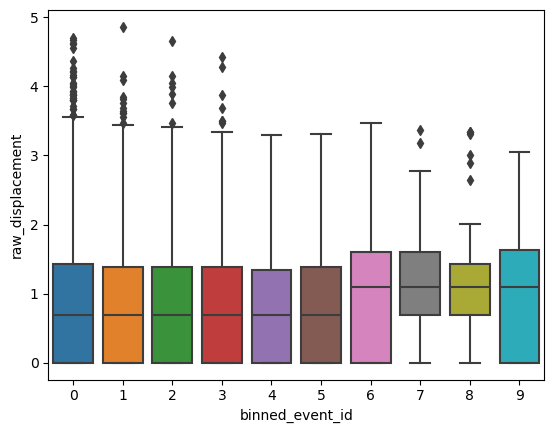

In [138]:
sns.boxplot(data=Subset_Subset_FirstContacts_interaction, x="binned_event_id", y=np.log1p(Subset_Subset_FirstContacts_interaction["raw_displacement"]))

In [139]:
# Find potential column informing about the direction of the displacement

Umap.columns[Umap.columns.str.contains("direction")]

Index(['direction'], dtype='object')

## Ball direction

In [ ]:
Umap["direction"].unique()

array([-1,  1])

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

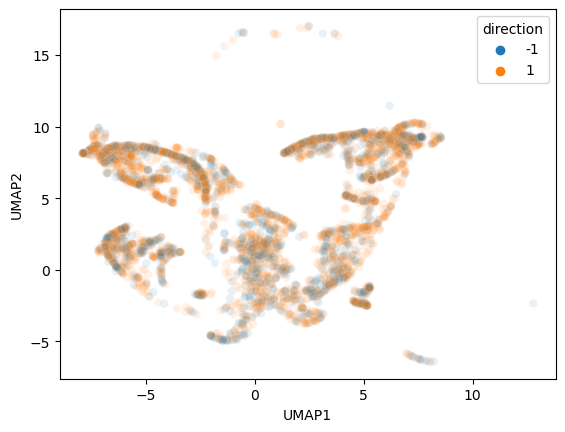

In [144]:
sns.scatterplot(
    data=Subset_interaction, x="UMAP1", y="UMAP2", alpha=0.1, hue="direction", palette="tab10"
)

/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:111

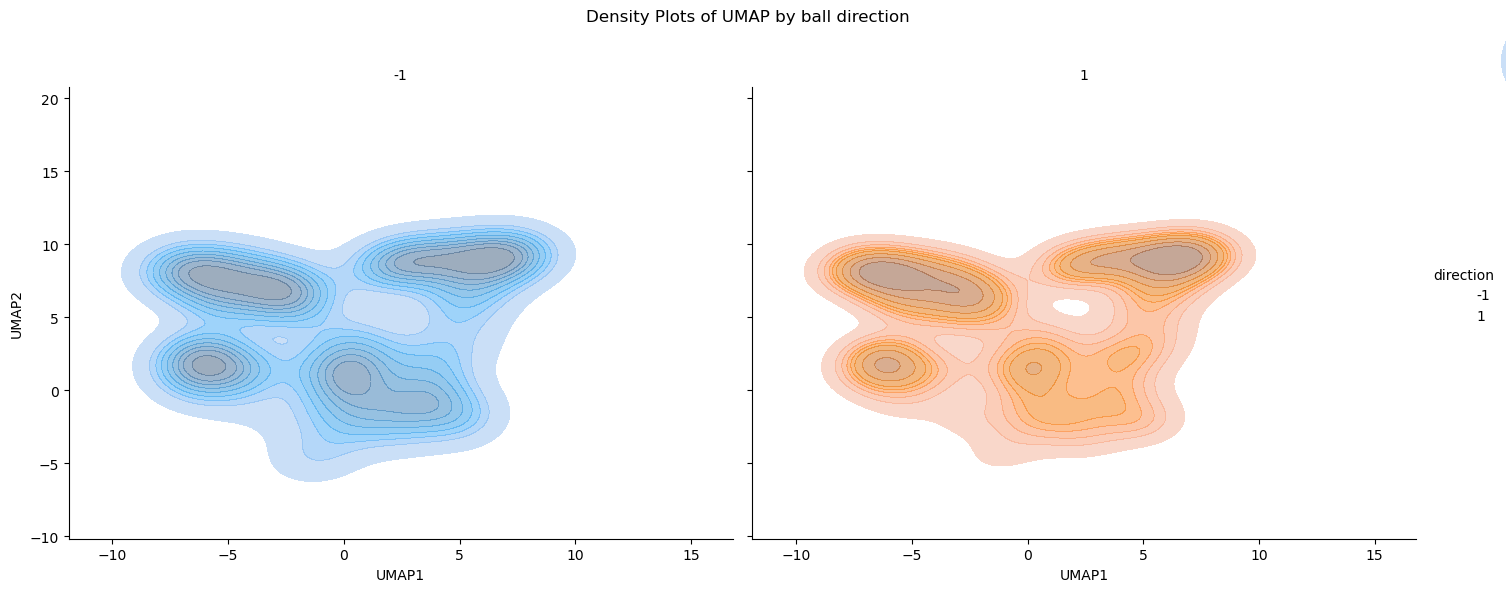

In [145]:
# Create a FacetGrid with two columns, one for each direction
g = sns.FacetGrid(
    Subset_interaction,
    col="direction",
    hue="direction",
    sharex=True,
    sharey=True,
    height=6,
    aspect=1.2,
)

# Map the kdeplot to the FacetGrid
g.map(sns.kdeplot, "UMAP1", "UMAP2", fill=True, alpha=0.5)

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Density Plots of UMAP by ball direction")

# Save the plot
plt.savefig(f"{output_dir}/UMAP_Direction_Density.png")
plt.show()
plt.close()



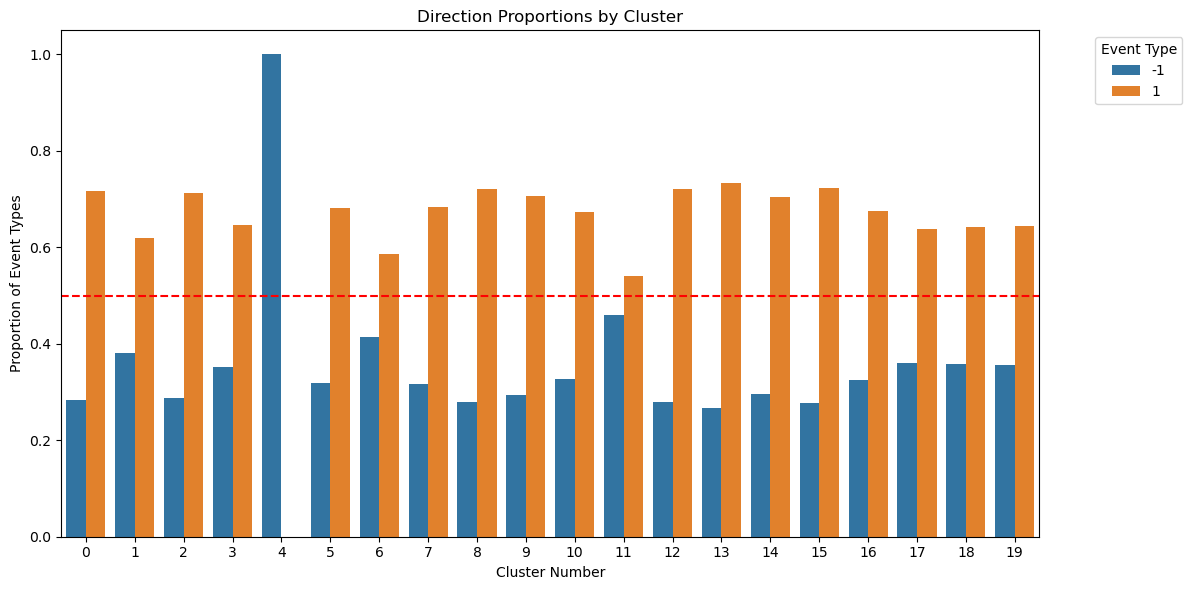

In [146]:
# Get unique clusters
unique_clusters = Subset_interaction["cluster"].unique()

# Initialize a DataFrame to store the proportions
proportions_df = pd.DataFrame()

# Process each cluster
for cluster_id in unique_clusters:
    cluster_data = Subset_interaction[Subset_interaction["cluster"] == cluster_id]
    
    # Count event types and calculate proportions
    event_counts = cluster_data["direction"].value_counts(normalize=True).reset_index()
    event_counts.columns = ["direction", "proportion"]
    event_counts["cluster"] = cluster_id
    
    # Append to the proportions DataFrame
    proportions_df = pd.concat([proportions_df, event_counts], ignore_index=True)

# Plot event type proportions as bar plots
plt.figure(figsize=(12, 6))
sns.barplot(data=proportions_df, x="cluster", y="proportion", hue="direction")
plt.axhline(0.5, color='red', linestyle='--')
plt.title("Direction Proportions by Cluster")
plt.xlabel("Cluster Number")
plt.ylabel("Proportion of Event Types")
plt.legend(title="Event Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig(f"{output_dir}/direction_proportions_by_cluster.png")
plt.show()
plt.close()

/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


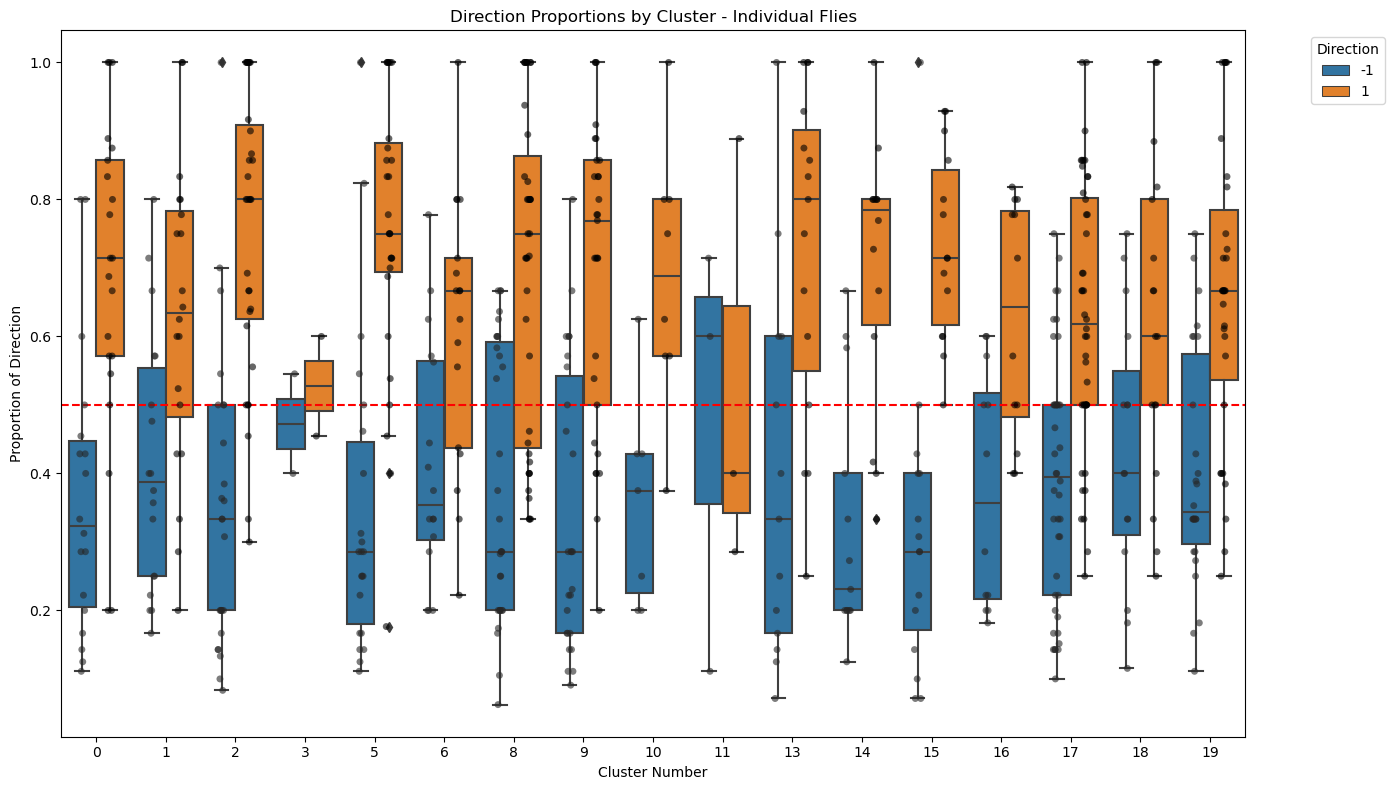

In [154]:
# Get unique clusters
unique_clusters = Subset_interaction["cluster"].unique()

# Initialize a DataFrame to store the individual fly proportions
fly_proportions_df = pd.DataFrame()

# Process each cluster and fly combination
for cluster_id in unique_clusters:
    cluster_data = Subset_interaction[Subset_interaction["cluster"] == cluster_id]
    
    # Get unique flies in this cluster
    unique_flies = cluster_data["fly"].unique()
    
    for fly_id in unique_flies:
        # Get data for this specific fly and cluster
        fly_cluster_data = cluster_data[cluster_data["fly"] == fly_id]
        
        # Only process if we have enough data points for this fly
        if len(fly_cluster_data) >= 5:  # Minimum threshold to calculate meaningful proportion
            # Count direction types and calculate proportions
            direction_counts = fly_cluster_data["direction"].value_counts(normalize=True).reset_index()
            direction_counts.columns = ["direction", "proportion"]
            direction_counts["cluster"] = cluster_id
            direction_counts["fly"] = fly_id
            
            # Append to the proportions DataFrame
            fly_proportions_df = pd.concat([fly_proportions_df, direction_counts], ignore_index=True)

# Plot with individual fly data points
plt.figure(figsize=(14, 8))

# Add individual datapoints as a swarm plot
sns.boxplot(data=fly_proportions_df, x="cluster", y="proportion", hue="direction")

# Add the mean proportion as reference points
sns.stripplot(data=fly_proportions_df, x="cluster", y="proportion", hue="direction",color="black", size=5, alpha=0.6, dodge=True)

plt.axhline(0.5, color='red', linestyle='--', label="Equal proportion")
plt.title("Direction Proportions by Cluster - Individual Flies")
plt.xlabel("Cluster Number")
plt.ylabel("Proportion of Direction")

# Create a better legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Direction", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Save the plot
plt.savefig(f"{output_dir}/direction_proportions_by_cluster_individual_flies.png")
plt.show()
plt.close()

In [ ]:
# Cluster by displacement

# Find columns that contain "displacement" in their name

Disp = Umap.filter(regex="displacement")

Disp

In [ ]:
sns.scatterplot(data=Umap, x="raw_displacement", y="cluster", alpha=0.1)

In [ ]:
# Get columns that have no x or y in their name, nor velocity

Umap.columns[~Umap.columns.str.contains("x|y|velocity")]

In [ ]:
PosPush = Umap[Umap["raw_displacement"] > 1]

In [ ]:
bin_metric(PosPush, "raw_displacement", 5)

In [ ]:
sns.histplot(data=PosPush, x="raw_displacement")

In [ ]:
sns.boxplot(data=Umap, x="cluster", y="raw_displacement")

# Adjust y range
plt.ylim(0, 10)

In [ ]:
Firstcontacts = Umap[Umap["event_id"] <10 ]

Firstcontacts = Firstcontacts[Firstcontacts["event_type"] == "interaction"]

In [ ]:
bin_metric(Firstcontacts, "start_distance", 10)

/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/

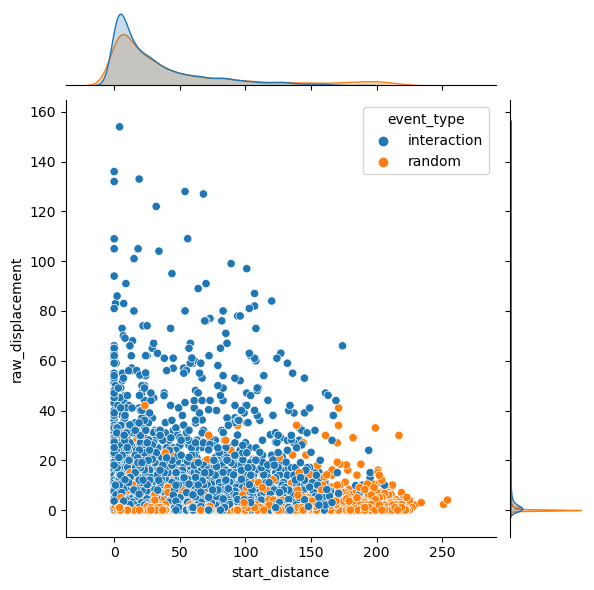

In [11]:
sns.jointplot(data=Umap, x="start_distance", y="raw_displacement", hue="event_type")

# plt.ylim(0, 10)

In [ ]:
# Plot side by side the umap values of event_type interaction and random with hue being the binned_end_distance
# Create a FacetGrid with two columns, one for each event_type
g = sns.FacetGrid(
    PosPush,
    col="event_type",
    sharex=True,
    sharey=True,
    height=6,
    aspect=1.2,
)

# Map the scatterplot to the FacetGrid
g.map_dataframe(
    sns.scatterplot,
    x="UMAP1",
    y="UMAP2",
    hue="cluster",
    alpha=0.5,
    palette="tab10",
)

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Density Plots of UMAP by Event Type")

# Save the plot
plt.savefig(f"{output_dir}/UMAP_event_types_efficiency_cluster.png")
plt.show()
plt.close()

In [ ]:
PosPush = Umap[Umap["raw_displacement"] >= 1]

In [ ]:
bin_metric(PosPush, "raw_displacement", 5)

In [ ]:
# Calculate cluster proportions over time by event type
cluster_proportions = (PosPush
                      .groupby(['event_type', 'binned_raw_displacement', 'cluster'])
                      .size()
                      .reset_index(name='count'))

# Calculate totals for proportions
totals = (cluster_proportions
         .groupby(['event_type', 'binned_raw_displacement'])['count']
         .sum()
         .reset_index(name='total'))

# Merge and calculate proportions
cluster_proportions = cluster_proportions.merge(
    totals, on=['event_type', 'binned_raw_displacement'])
cluster_proportions['proportion'] = cluster_proportions['count'] / cluster_proportions['total']

In [ ]:
plt.figure(figsize=(20, 10))

for i, event_type in enumerate(PosPush["event_type"].unique()):
    plt.subplot(1, 2, i + 1)

    # Filter to just this event type
    event_data = cluster_proportions[cluster_proportions["event_type"] == event_type]

    # Plot a line for each cluster
    for cluster in sorted(PosPush["cluster"].unique()):
        cluster_data = event_data[event_data["cluster"] == cluster]
        if not cluster_data.empty:
            plt.plot(
                cluster_data["binned_raw_displacement"],
                cluster_data["proportion"],
                marker="o",
                linewidth=2,
                label=f"Cluster {cluster}",
            )

    plt.title(f"Cluster Efficiency - {event_type}", fontsize=14)
    plt.xlabel("Efficiency", fontsize=12)
    plt.ylabel("Proportion of Events", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.savefig(f"{output_dir}/positive_disps_cluster_efficiency_line_plots.png")
plt.show()

In [ ]:
# Calculate cluster proportions over time by event type
cluster_proportions = (
    Umap.groupby(["binned_raw_displacement", "cluster"])
    .size()
    .reset_index(name="count")
)

# Calculate totals for proportions
totals = (
    cluster_proportions.groupby(["binned_raw_displacement"])["count"]
    .sum()
    .reset_index(name="total")
)

# Merge and calculate proportions
cluster_proportions = cluster_proportions.merge(
    totals, on=["binned_raw_displacement"]
)
cluster_proportions["proportion"] = (
    cluster_proportions["count"] / cluster_proportions["total"]
)
plt.figure(figsize=(20, 10))

# Plot a line for each cluster
for cluster in sorted(Umap["cluster"].unique()):
    cluster_data = event_data[event_data["cluster"] == cluster]
    if not cluster_data.empty:
        plt.plot(
            cluster_data["binned_raw_displacement"],
            cluster_data["proportion"],
            marker="o",
            linewidth=2,
            label=f"Cluster {cluster}",
        )

plt.title(f"Cluster Efficiency", fontsize=14)
plt.xlabel("Efficiency", fontsize=12)
plt.ylabel("Proportion of Events", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.savefig(f"{output_dir}/cluster_efficiency_line_plots_pooled.png")
plt.show()

In [ ]:
# Calculate cluster proportions over time by event type AND fly
fly_cluster_proportions = (
    Umap.groupby(["fly", "event_type", "binned_raw_displacement", "cluster"])
    .size()
    .reset_index(name="count")
)

# Calculate totals for proportions (per fly and time bin)
fly_totals = (
    fly_cluster_proportions.groupby(["fly", "event_type", "binned_raw_displacement"])["count"]
    .sum()
    .reset_index(name="total")
)

# Merge and calculate proportions
fly_cluster_proportions = fly_cluster_proportions.merge(
    fly_totals, on=["fly", "event_type", "binned_raw_displacement"]
)
fly_cluster_proportions["proportion"] = (
    fly_cluster_proportions["count"] / fly_cluster_proportions["total"]
)

In [ ]:
# Create a facet grid of box plots
g = sns.FacetGrid(
    fly_cluster_proportions,
    col="event_type",
    row="cluster",
    margin_titles=True,
    height=3,
    aspect=1.5,
)

# Map the box plot
g.map_dataframe(sns.boxplot, x="binned_raw_displacement", y="proportion", color="skyblue")

# Add strip plot to show individual fly points
g.map_dataframe(
    sns.stripplot,
    x="binned_raw_displacement",
    y="proportion",
    color="black",
    size=2,
    alpha=0.5,
    jitter=True,
)

# Add titles and labels
g.set_axis_labels("Time Bin", "Proportion")
g.set_titles(col_template="{col_name}", row_template="Cluster {row_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Cluster Distribution by Efficiency", fontsize=16)

plt.savefig(f"{output_dir}/cluster_evolution_by_efficiency_box_plots.png")
plt.show()

# UMAP only with interaction data

In [ ]:
Interaction_UMAP = pd.read_feather("/mnt/upramdya_data/MD/Ballpushing_Exploration/Datasets/250312_StdContacts_Ctrl_noRandom_cutoff_300frames_Data/UMAP/250312_pooled_standardized_contacts.feather")

In [ ]:
# Define and create if not exist output directory

output_dir = Path("/mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250311_Pooled_FeedingState_InteractionsOnly_300Frames")

output_dir.mkdir(parents=True, exist_ok=True)


In [ ]:

# Scatter plot of UMAP1 vs UMAP2

sns.scatterplot(data=Interaction_UMAP, x="UMAP1", y="UMAP2", alpha = 0.1)

# save the plot

plt.savefig(f"{output_dir}/UMAP.png")


In [ ]:
# Same with density

plt.figure(figsize=(8, 6))

sns.kdeplot(data=Interaction_UMAP, x="UMAP1", y="UMAP2", fill=True, alpha=0.5)

plt.savefig(f"{output_dir}/UMAP_density.png")

plt.show()

# Cluster detection

In [ ]:
# Identify clusters based on KMeans

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12, random_state=0).fit(Interaction_UMAP[["UMAP1", "UMAP2"]])

Interaction_UMAP["cluster"] = kmeans.labels_

plt.figure(figsize=(8, 6))

sns.scatterplot(data=Interaction_UMAP, x="UMAP1", y="UMAP2", alpha = 0.1, hue="cluster", palette="tab10")

# Save the plot

plt.savefig(f"{output_dir}/UMAP_Clusters.png")

plt.show()

# Looking at metrics of time / progress

In [ ]:
bin_metric(Interaction_UMAP, "event_id", 50)

# Event ID

In [ ]:
sns.scatterplot(data=Interaction_UMAP, x="UMAP1", y="UMAP2", hue="binned_event_id", alpha = 0.4, palette="viridis")

In [ ]:
# Look at distribution of event id

sns.histplot(data=Interaction_UMAP, x="event_id", bins=50)

In [ ]:
# Create the FacetGrid with multiple columns
g = sns.FacetGrid(Interaction_UMAP, col="binned_event_id", hue="binned_event_id", sharex=True, sharey=True, height=10, aspect=1.2, col_wrap=5)

# Map the kdeplot to the FacetGrid
g.map(sns.kdeplot, "UMAP1", "UMAP2", fill=True, alpha=0.5)

# Standardize x and y range for all subplots
g.set(xlim=(Interaction_UMAP["UMAP1"].min()-3, Interaction_UMAP["UMAP1"].max()+3), ylim=(Interaction_UMAP["UMAP2"].min()-3, Interaction_UMAP["UMAP2"].max()+3))

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Density Plots of UMAP by Event ID")

# Save the plot
plt.savefig(f"{output_dir}/UMAP_event_id_density.png")
plt.show()

In [ ]:
# Create the FacetGrid with multiple columns
g = sns.FacetGrid(Interaction_UMAP, col="binned_event_id", hue="binned_event_id", sharex=True, sharey=True, height=10, aspect=1.2, col_wrap=5)

# Map the kdeplot to the FacetGrid
g.map(sns.scatterplot, "UMAP1", "UMAP2", alpha=0.5)

# Standardize x and y range for all subplots
g.set(xlim=(Interaction_UMAP["UMAP1"].min()-3, Interaction_UMAP["UMAP1"].max()+3), ylim=(Interaction_UMAP["UMAP2"].min()-3, Interaction_UMAP["UMAP2"].max()+3))

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("UMAP by Event ID")

# Save the plot
plt.savefig(f"{output_dir}/UMAP_event_id.png")
plt.show()

In [ ]:
# Get unique event_ids
unique_event_ids = Interaction_UMAP["binned_event_id"].unique()

# Initialize a DataFrame to store the proportions
proportions_df = pd.DataFrame()

# Process each event_id
for event_id in unique_event_ids:
    event_data = Interaction_UMAP[Interaction_UMAP["binned_event_id"] == event_id]
    
    # Count clusters and calculate proportions within the event_id
    cluster_counts = event_data["cluster"].value_counts(normalize=True).reset_index()
    cluster_counts.columns = ["cluster", "proportion"]
    cluster_counts["binned_event_id"] = event_id
    
    # Append to the proportions DataFrame
    proportions_df = pd.concat([proportions_df, cluster_counts], ignore_index=True)

# Plot cluster proportions as bar plots
plt.figure(figsize=(30, 30))
sns.lineplot(data=proportions_df, x="binned_event_id", y="proportion", hue="cluster", palette="tab10", linewidth=2)
plt.title("Cluster Proportions by Event ID")
plt.xlabel("Event ID (Binned)")
plt.ylabel("Proportion of Clusters")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig(f"{output_dir}/cluster_proportions_by_binned_event_id.png")
plt.show()
plt.close()

In [ ]:
# Group the data by fly and binned_event_id and calculate proportions
grouped = Interaction_UMAP.groupby(["fly", "binned_event_id", "cluster"]).size().reset_index(name="count")
total_counts = grouped.groupby(["fly", "binned_event_id"])["count"].transform("sum")
grouped["proportion"] = grouped["count"] / total_counts

# Plot cluster proportions as box plots with jittered strip plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=grouped, x="binned_event_id", y="proportion", hue="cluster", palette="tab10")
#sns.stripplot(data=grouped, x="binned_event_id", y="proportion", hue="cluster", dodge=True, color="black", alpha=0.5, jitter=False)

# Adjust plot aesthetics
plt.title("Cluster Proportions by Event ID (Grouped by Fly)")
plt.xlabel("Event ID (Binned)")
plt.ylabel("Proportion of Clusters")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig(f"{output_dir}/jitterbp_cluster_proportions_by_binned_event_id_grouped_by_fly.png")
plt.show()
plt.close()

# With event id subset

In [ ]:
FirstIDs = Interaction_UMAP[Interaction_UMAP["event_id"] < 30]

In [ ]:
sns.scatterplot(data=FirstIDs, x="UMAP1", y="UMAP2", hue="event_id", alpha = 0.4, palette="viridis")

In [ ]:
# Create the FacetGrid with multiple columns
g = sns.FacetGrid(FirstIDs, col="event_id", hue="event_id", sharex=True, sharey=True, height=10, aspect=1.2, col_wrap=5)

# Map the kdeplot to the FacetGrid
g.map(sns.kdeplot, "UMAP1", "UMAP2", fill=True, alpha=0.5)

# Standardize x and y range for all subplots
g.set(xlim=(FirstIDs["UMAP1"].min()-3, FirstIDs["UMAP1"].max()+3), ylim=(FirstIDs["UMAP2"].min()-3, FirstIDs["UMAP2"].max()+3))

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Density Plots of UMAP by Event ID")

# Save the plot
plt.savefig(f"{output_dir}/UMAP_event_id_subset_density.png")
plt.show()

In [ ]:
# Get unique event_ids
unique_event_ids = FirstIDs["event_id"].unique()

# Initialize a DataFrame to store the proportions
proportions_df = pd.DataFrame()

# Process each event_id
for event_id in unique_event_ids:
    event_data = FirstIDs[FirstIDs["event_id"] == event_id]
    
    # Count clusters and calculate proportions within the event_id
    cluster_counts = event_data["cluster"].value_counts(normalize=True).reset_index()
    cluster_counts.columns = ["cluster", "proportion"]
    cluster_counts["event_id"] = event_id
    
    # Append to the proportions DataFrame
    proportions_df = pd.concat([proportions_df, cluster_counts], ignore_index=True)

# Plot cluster proportions as bar plots
plt.figure(figsize=(30, 30))
sns.lineplot(data=proportions_df, x="event_id", y="proportion", hue="cluster", palette="tab10", linewidth=2)
plt.title("Cluster Proportions by Event ID")
plt.xlabel("Event ID (Binned)")
plt.ylabel("Proportion of Clusters")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig(f"{output_dir}/cluster_proportions_by_event_id.png")
plt.show()
plt.close()

In [ ]:
# Group the data by fly and binned_event_id and calculate proportions
grouped = FirstIDs.groupby(["fly", "event_id", "cluster"]).size().reset_index(name="count")
total_counts = grouped.groupby(["fly", "event_id"])["count"].transform("sum")
grouped["proportion"] = grouped["count"] / total_counts

# Plot cluster proportions as box plots with jittered strip plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=grouped, x="event_id", y="proportion", hue="cluster", palette="tab10")
#sns.stripplot(data=grouped, x="binned_event_id", y="proportion", hue="cluster", dodge=True, color="black", alpha=0.5, jitter=False)

# Adjust plot aesthetics
plt.title("Cluster Proportions by Event ID (Grouped by Fly)")
plt.xlabel("Event ID (Binned)")
plt.ylabel("Proportion of Clusters")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig(f"{output_dir}/jitterbp_cluster_proportions_by_event_id_grouped_by_fly.png")
plt.show()
plt.close()

# Test with time

In [ ]:
# Lets generate a binned time

bin_metric(Interaction_UMAP, "start", 20)

In [ ]:
sns.scatterplot(data=Interaction_UMAP, x="UMAP1", y="UMAP2", hue="binned_start", alpha = 0.4, palette="viridis")

In [ ]:
# Create the FacetGrid with multiple columns
g = sns.FacetGrid(Interaction_UMAP, col="binned_start", hue="binned_start", sharex=True, sharey=True, height=10, aspect=1.2, col_wrap=5)

# Map the kdeplot to the FacetGrid
g.map(sns.kdeplot, "UMAP1", "UMAP2", fill=True, alpha=0.5)

# Standardize x and y range for all subplots
g.set(xlim=(Interaction_UMAP["UMAP1"].min()-3, Interaction_UMAP["UMAP1"].max()+3), ylim=(Interaction_UMAP["UMAP2"].min()-3, Interaction_UMAP["UMAP2"].max()+3))

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Density Plots of UMAP by Event ID")

# Save the plot
plt.savefig(f"{output_dir}/UMAP_time_density.png")
plt.show()

In [ ]:
# Create the FacetGrid with multiple columns
g = sns.FacetGrid(Interaction_UMAP, col="binned_start", hue="binned_start", sharex=True, sharey=True, height=10, aspect=1.2, col_wrap=5)

# Map the kdeplot to the FacetGrid
g.map(sns.scatterplot, "UMAP1", "UMAP2", alpha=0.5)

# Standardize x and y range for all subplots
g.set(xlim=(Interaction_UMAP["UMAP1"].min()-3, Interaction_UMAP["UMAP1"].max()+3), ylim=(Interaction_UMAP["UMAP2"].min()-3, Interaction_UMAP["UMAP2"].max()+3))

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("UMAP by Event ID")

# Save the plot
plt.savefig(f"{output_dir}/UMAP_time.png")
plt.show()

In [ ]:
# Get unique event_ids
unique_event_ids = Interaction_UMAP["binned_start"].unique()

# Initialize a DataFrame to store the proportions
proportions_df = pd.DataFrame()

# Process each event_id
for event_id in unique_event_ids:
    event_data = Interaction_UMAP[Interaction_UMAP["binned_start"] == event_id]
    
    # Count clusters and calculate proportions within the event_id
    cluster_counts = event_data["cluster"].value_counts(normalize=True).reset_index()
    cluster_counts.columns = ["cluster", "proportion"]
    cluster_counts["binned_start"] = event_id
    
    # Append to the proportions DataFrame
    proportions_df = pd.concat([proportions_df, cluster_counts], ignore_index=True)

# Plot cluster proportions as bar plots
plt.figure(figsize=(30, 30))
sns.lineplot(data=proportions_df, x="binned_start", y="proportion", hue="cluster", palette="tab10", linewidth=2)
plt.title("Cluster Proportions by Event ID")
plt.xlabel("Event ID (Binned)")
plt.ylabel("Proportion of Clusters")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig(f"{output_dir}/cluster_proportions_by_binned_start.png")
plt.show()
plt.close()

In [ ]:
# Group the data by fly and binned_event_id and calculate proportions
grouped = Interaction_UMAP.groupby(["fly", "binned_start", "cluster"]).size().reset_index(name="count")
total_counts = grouped.groupby(["fly", "binned_start"])["count"].transform("sum")
grouped["proportion"] = grouped["count"] / total_counts

# Plot cluster proportions as box plots with jittered strip plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=grouped, x="binned_start", y="proportion", hue="cluster", palette="tab10")
#sns.stripplot(data=grouped, x="binned_start", y="proportion", hue="cluster", dodge=True, color="black", alpha=0.5, jitter=False)

# Adjust plot aesthetics
plt.title("Cluster Proportions by Event ID (Grouped by Fly)")
plt.xlabel("Event ID (Binned)")
plt.ylabel("Proportion of Clusters")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig(f"{output_dir}/jitterbp_cluster_proportions_by_binned_start_grouped_by_fly.png")
plt.show()
plt.close()

In [ ]:
# Keep only first and last binned_start values

Subset = Interaction_UMAP[Interaction_UMAP["binned_start"].isin([0, 19])]

# Group the data by fly and binned_event_id and calculate proportions
grouped = Subset.groupby(["fly", "binned_start", "cluster"]).size().reset_index(name="count")
total_counts = grouped.groupby(["fly", "binned_start"])["count"].transform("sum")
grouped["proportion"] = grouped["count"] / total_counts

# Plot cluster proportions as box plots with jittered strip plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=grouped, x="binned_start", y="proportion", hue="cluster", palette="tab10")
#sns.stripplot(data=grouped, x="binned_start", y="proportion", hue="cluster", dodge=True, color="black", alpha=0.5, jitter=False)

# Adjust plot aesthetics
plt.title("Cluster Proportions by Event ID (Grouped by Fly)")
plt.xlabel("Event ID (Binned)")
plt.ylabel("Proportion of Clusters")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig(f"{output_dir}/jitterbp_cluster_proportions_by_binned_start_grouped_by_fly_subset.png")
plt.show()
plt.close()

# By ball position



In [ ]:
# Lets generate a binned time

bin_metric(Interaction_UMAP, "median_euclidean_distance", 20)

In [ ]:
Interaction_UMAP.columns[Interaction_UMAP.columns.str.contains("displacement")]

In [ ]:
sns.histplot(data=Interaction_UMAP, x="y_centre_preprocessed_disp_mean", bins=20)

In [ ]:
sns.scatterplot(data=Interaction_UMAP, x="UMAP1", y="UMAP2", hue="binned_median_euclidean_distance", alpha = 0.4, palette="viridis")

In [ ]:
# Create the FacetGrid with multiple columns
g = sns.FacetGrid(Interaction_UMAP, col="binned_median_euclidean_distance", hue="binned_median_euclidean_distance", sharex=True, sharey=True, height=10, aspect=1.2, col_wrap=5)

# Map the kdeplot to the FacetGrid
g.map(sns.kdeplot, "UMAP1", "UMAP2", fill=True, alpha=0.5)

# Standardize x and y range for all subplots
g.set(xlim=(Interaction_UMAP["UMAP1"].min()-3, Interaction_UMAP["UMAP1"].max()+3), ylim=(Interaction_UMAP["UMAP2"].min()-3, Interaction_UMAP["UMAP2"].max()+3))

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Density Plots of UMAP by Event ID")

# Save the plot
plt.savefig(f"{output_dir}/UMAP_distance_density.png")
plt.show()

In [ ]:
# Create the FacetGrid with multiple columns
g = sns.FacetGrid(Interaction_UMAP, col="binned_median_euclidean_distance", hue="binned_median_euclidean_distance", sharex=True, sharey=True, height=10, aspect=1.2, col_wrap=5)

# Map the kdeplot to the FacetGrid
g.map(sns.scatterplot, "UMAP1", "UMAP2", alpha=0.5)

# Standardize x and y range for all subplots
g.set(xlim=(Interaction_UMAP["UMAP1"].min()-3, Interaction_UMAP["UMAP1"].max()+3), ylim=(Interaction_UMAP["UMAP2"].min()-3, Interaction_UMAP["UMAP2"].max()+3))

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("UMAP by Event ID")

# Save the plot
plt.savefig(f"{output_dir}/UMAP_distance.png")
plt.show()

In [ ]:
# Get unique event_ids
unique_event_ids = Interaction_UMAP["binned_start"].unique()

# Initialize a DataFrame to store the proportions
proportions_df = pd.DataFrame()

# Process each event_id
for event_id in unique_event_ids:
    event_data = Interaction_UMAP[Interaction_UMAP["binned_start"] == event_id]
    
    # Count clusters and calculate proportions within the event_id
    cluster_counts = event_data["cluster"].value_counts(normalize=True).reset_index()
    cluster_counts.columns = ["cluster", "proportion"]
    cluster_counts["binned_start"] = event_id
    
    # Append to the proportions DataFrame
    proportions_df = pd.concat([proportions_df, cluster_counts], ignore_index=True)

# Plot cluster proportions as bar plots
plt.figure(figsize=(30, 30))
sns.lineplot(data=proportions_df, x="binned_start", y="proportion", hue="cluster", palette="tab10", linewidth=2)
plt.title("Cluster Proportions by Event ID")
plt.xlabel("Event ID (Binned)")
plt.ylabel("Proportion of Clusters")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig(f"{output_dir}/cluster_proportions_by_binned_start.png")
plt.show()
plt.close()

In [ ]:
# Group the data by fly and binned_event_id and calculate proportions
grouped = Interaction_UMAP.groupby(["fly", "binned_start", "cluster"]).size().reset_index(name="count")
total_counts = grouped.groupby(["fly", "binned_start"])["count"].transform("sum")
grouped["proportion"] = grouped["count"] / total_counts

# Plot cluster proportions as box plots with jittered strip plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=grouped, x="binned_start", y="proportion", hue="cluster", palette="tab10")
#sns.stripplot(data=grouped, x="binned_start", y="proportion", hue="cluster", dodge=True, color="black", alpha=0.5, jitter=False)

# Adjust plot aesthetics
plt.title("Cluster Proportions by Event ID (Grouped by Fly)")
plt.xlabel("Event ID (Binned)")
plt.ylabel("Proportion of Clusters")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig(f"{output_dir}/jitterbp_cluster_proportions_by_binned_start_grouped_by_fly.png")
plt.show()
plt.close()

In [ ]:
# Keep only first and last binned_start values

Subset = Interaction_UMAP[Interaction_UMAP["binned_start"].isin([0, 19])]

# Group the data by fly and binned_event_id and calculate proportions
grouped = Subset.groupby(["fly", "binned_start", "cluster"]).size().reset_index(name="count")
total_counts = grouped.groupby(["fly", "binned_start"])["count"].transform("sum")
grouped["proportion"] = grouped["count"] / total_counts

# Plot cluster proportions as box plots with jittered strip plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=grouped, x="binned_start", y="proportion", hue="cluster", palette="tab10")
#sns.stripplot(data=grouped, x="binned_start", y="proportion", hue="cluster", dodge=True, color="black", alpha=0.5, jitter=False)

# Adjust plot aesthetics
plt.title("Cluster Proportions by Event ID (Grouped by Fly)")
plt.xlabel("Event ID (Binned)")
plt.ylabel("Proportion of Clusters")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig(f"{output_dir}/jitterbp_cluster_proportions_by_binned_start_grouped_by_fly_subset.png")
plt.show()
plt.close()

# Check whether some clusters are associated with more or less efficiency

In [ ]:
sns.histplot(Interaction_UMAP["raw_displacement"])

In [ ]:
# Positive push 

PosPush = Interaction_UMAP[Interaction_UMAP["raw_displacement"] > 0]

In [ ]:
sns.scatterplot(data=PosPush, x="UMAP1", y="UMAP2", hue="raw_displacement", alpha = 0.4, palette="viridis")

In [ ]:
bin_metric(PosPush, "raw_displacement", 10)

In [ ]:
# Create the FacetGrid with multiple columns
g = sns.FacetGrid(PosPush, col="binned_raw_displacement", hue="binned_raw_displacement", sharex=True, sharey=True, height=10, aspect=1.2, col_wrap=5)

# Map the kdeplot to the FacetGrid
g.map(sns.kdeplot, "UMAP1", "UMAP2", fill=True, alpha=0.5)

# Standardize x and y range for all subplots
g.set(xlim=(PosPush["UMAP1"].min()-3, PosPush["UMAP1"].max()+3), ylim=(PosPush["UMAP2"].min()-3, PosPush["UMAP2"].max()+3))

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Density Plots of UMAP by Event ID")

# Save the plot
plt.savefig(f"{output_dir}/UMAP_disp_density.png")
plt.show()

In [ ]:
# Get unique event_ids
unique_event_ids = PosPush["binned_raw_displacement"].unique()

# Initialize a DataFrame to store the proportions
proportions_df = pd.DataFrame()

# Process each event_id
for event_id in unique_event_ids:
    event_data = PosPush[PosPush["binned_raw_displacement"] == event_id]
    
    # Count clusters and calculate proportions within the event_id
    cluster_counts = event_data["cluster"].value_counts(normalize=True).reset_index()
    cluster_counts.columns = ["cluster", "proportion"]
    cluster_counts["binned_raw_displacement"] = event_id
    
    # Append to the proportions DataFrame
    proportions_df = pd.concat([proportions_df, cluster_counts], ignore_index=True)

# Plot cluster proportions as bar plots
plt.figure(figsize=(30, 30))
sns.lineplot(data=proportions_df, x="binned_raw_displacement", y="proportion", hue="cluster", palette="tab20", linewidth=2)
plt.title("Cluster Proportions by Event ID")
plt.xlabel("Event ID (Binned)")
plt.ylabel("Proportion of Clusters")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig(f"{output_dir}/cluster_proportions_by_binned_raw_displacement.png")
plt.show()
plt.close()

In [ ]:
# Get unique values for fly, binned_raw_displacement, and cluster
unique_flies = PosPush["fly"].unique()
unique_binned_raw_displacement = PosPush["binned_raw_displacement"].unique()
unique_clusters = PosPush["cluster"].unique()

# Create a MultiIndex with all combinations of fly, binned_raw_displacement, and cluster
index = pd.MultiIndex.from_product([unique_flies, unique_binned_raw_displacement, unique_clusters], names=["fly", "binned_raw_displacement", "cluster"])

# Group the data by fly, binned_raw_displacement, and cluster, and calculate counts
grouped = PosPush.groupby(["fly", "binned_raw_displacement", "cluster"]).size().reset_index(name="count")

# Reindex the grouped data to include all combinations, filling missing values with zero
grouped = grouped.set_index(["fly", "binned_raw_displacement", "cluster"]).reindex(index, fill_value=0).reset_index()

# Calculate proportions within each fly and binned_raw_displacement
total_counts = grouped.groupby(["fly", "binned_raw_displacement"])["count"].transform("sum")
grouped["proportion"] = grouped["count"] / total_counts

# Plot cluster proportions as box plots with jittered strip plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=grouped, x="binned_raw_displacement", y="proportion", hue="cluster", palette="tab10")
sns.stripplot(data=grouped, x="binned_raw_displacement", y="proportion", hue="cluster", dodge=True, color="black", alpha=0.5, jitter=True)

# Adjust plot aesthetics
plt.title("Cluster Proportions by Event ID (Grouped by Fly)")
plt.xlabel("Event ID (Binned)")
plt.ylabel("Proportion of Clusters")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig(f"{output_dir}/jitterbp_cluster_proportions_by_binned_raw_displacement_grouped_by_fly.png")
plt.show()
plt.close()